In [1]:
import argparse
import numpy as np
import torch
from utils import get_dataset, get_net, get_strategy
from pprint import pprint
import pickle

Files already downloaded and verified


In [2]:
# 'EMNIST_log'
# 'CIFAR10_log'
# "EMNIST_cnn"
# "CIFAR10_cnn"
# "Imagenet_res_cnn"
# "Imagenet_res_res18"

In [3]:
# choices=["RandomSampling", 
#                              "LeastConfidence", 
#                              "MarginSampling", 
#                              "EntropySampling", 
#                              "LeastConfidenceDropout", 
#                              "MarginSamplingDropout", 
#                              "EntropySamplingDropout", 
#                              "KMeansSampling",
#                              "KCenterGreedy", 
#                              "BALDDropout", 
#                              "AdversarialBIM", 
#                              "AdversarialDeepFool"]

In [4]:
samples = np.load("../new_marich/results/samp_lr_cifar.npy")

In [8]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "CIFAR10_log"
strat = "KCenterGreedy"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.3000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.00s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.69it/s]


Round 0 testing accuracy: 28.34 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:02<00:00, 31.43it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.74it/s]




Round 1 testing accuracy: 14.84 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:03<00:00, 21.13it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5189, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.5519, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.5566, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.5802, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.20it/s]




Round 2 testing accuracy: 18.65 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:05<00:00, 14.62it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5591, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.5914, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.6308, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.6416, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.6237, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  4.00s/it]

saving model
Train accuracy =  tensor(0.6810, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.6810, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.6989, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.52it/s]




Round 3 testing accuracy: 25.290000000000003 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:07<00:00, 12.40it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5989, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.6218, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.6304, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.6218, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.5989, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.6447, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.6476, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.16s/it]

saving model
Train accuracy =  tensor(0.6819, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.07s/it]

saving model
Train accuracy =  tensor(0.6991, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.07it/s]




Round 4 testing accuracy: 36.29 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.63it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6755, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.6899, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.6971, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.6707, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.6923, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.7115, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.7380, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.7548, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]




Round 5 testing accuracy: 53.2 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:09<00:00,  9.19it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7169, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.7376, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.7438, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.6921, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.7231, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.7479, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.7645, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.7707, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7727, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]




Round 6 testing accuracy: 37.04 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:10<00:00,  7.84it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7143, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.7541, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.7595, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.7468, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.7631, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.11s/it]

saving model
Train accuracy =  tensor(0.7613, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.7776, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.16s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.13s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.26it/s]




Round 7 testing accuracy: 51.970000000000006 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:12<00:00,  7.28it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7356, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.7660, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.7324, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.7260, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.7468, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.7772, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.7917, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.96it/s]




Round 8 testing accuracy: 48.52 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:12<00:00,  6.81it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7666, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.7781, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.7795, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.7752, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.7824, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.7738, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.7925, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.8069, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.52it/s]




Round 9 testing accuracy: 52.470000000000006 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:15<00:00,  5.92it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7862, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.44s/it]

saving model
Train accuracy =  tensor(0.7992, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.8188, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.8044, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.8031, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.8057, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.8305, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.8383, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.00s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.87it/s]




Round 10 testing accuracy: 53.98 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.3500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.4500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.34it/s]


Round 0 testing accuracy: 24.759999999999998 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:03<00:00, 26.62it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4898, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.09s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.98it/s]




Round 1 testing accuracy: 19.689999999999998 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:04<00:00, 19.86it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5472, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.5755, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  4.00s/it]

saving model
Train accuracy =  tensor(0.5849, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.6132, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:14,  3.73s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.74s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.76s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.6745, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.50it/s]




Round 2 testing accuracy: 19.05 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:05<00:00, 16.00it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5520, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.5771, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.6093, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.6380, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.6595, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.6703, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.6918, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.6918, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.56it/s]




Round 3 testing accuracy: 29.56 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:06<00:00, 13.19it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6218, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.6447, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.6447, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.6361, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.6705, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.76s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.72s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.72s/it]

saving model
Train accuracy =  tensor(0.7106, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.70s/it]

saving model
Train accuracy =  tensor(0.7278, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.71s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.73s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.63it/s]




Round 4 testing accuracy: 44.39 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:06<00:00, 12.09it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6707, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.6923, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.6995, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.6923, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.6635, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.6755, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.76s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.75s/it]

saving model
Train accuracy =  tensor(0.7332, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.7572, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.57it/s]




Round 5 testing accuracy: 46.39 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:09<00:00,  9.37it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7149, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.7438, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.7521, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.7231, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.7273, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.20s/it]

saving model
Train accuracy =  tensor(0.7479, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.7645, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.7769, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.7934, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.7955, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.62it/s]




Round 6 testing accuracy: 51.93 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:10<00:00,  8.20it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7505, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.46s/it]

saving model
Train accuracy =  tensor(0.7541, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.7613, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  4.00s/it]

saving model
Train accuracy =  tensor(0.7233, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.7269, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.7523, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.7758, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7595, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.7776, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.19it/s]




Round 7 testing accuracy: 50.449999999999996 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:11<00:00,  7.44it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7340, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.78s/it]

saving model
Train accuracy =  tensor(0.7436, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.76s/it]

saving model
Train accuracy =  tensor(0.7612, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.7356, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.73s/it]

saving model
Train accuracy =  tensor(0.7564, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.75s/it]

saving model
Train accuracy =  tensor(0.7821, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.7949, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.8013, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.42it/s]




Round 8 testing accuracy: 58.720000000000006 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:12<00:00,  7.04it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7839, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.71s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.70s/it]

saving model
Train accuracy =  tensor(0.8084, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.72s/it]

saving model
Train accuracy =  tensor(0.7853, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.71s/it]

saving model
Train accuracy =  tensor(0.7983, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.71s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.76s/it]

saving model
Train accuracy =  tensor(0.8213, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.75s/it]

saving model
Train accuracy =  tensor(0.8458, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.73s/it]

saving model
Train accuracy =  tensor(0.8516, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.73s/it]

saving model
Train accuracy =  tensor(0.8545, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.73s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.01it/s]




Round 9 testing accuracy: 58.230000000000004 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:15<00:00,  5.97it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8253, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.8305, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.8188, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.7914, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8266, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.73s/it]

saving model
Train accuracy =  tensor(0.8540, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.8579, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.41it/s]




Round 10 testing accuracy: 59.61 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.76s/it]

saving model
Train accuracy =  tensor(0.3500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.74s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.15it/s]


Round 0 testing accuracy: 19.88 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:02<00:00, 34.08it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4694, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.5102, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.76s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.05it/s]




Round 1 testing accuracy: 20.02 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:03<00:00, 21.08it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6038, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.11it/s]




Round 2 testing accuracy: 23.86 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:04<00:00, 17.83it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6093, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.6523, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.6559, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.6237, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.6022, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.6272, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.6416, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.6487, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.6595, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.07it/s]




Round 3 testing accuracy: 23.44 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:06<00:00, 14.16it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5874, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.91s/it]

saving model
Train accuracy =  tensor(0.6189, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.18s/it]

saving model
Train accuracy =  tensor(0.6562, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.6619, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.6734, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.6819, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.6819, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.75s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.7335, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.7364, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.18it/s]




Round 4 testing accuracy: 36.720000000000006 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.19it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6851, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.6995, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.7043, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.6827, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.7067, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.7212, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.7356, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.33it/s]




Round 5 testing accuracy: 42.84 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:09<00:00,  8.84it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7107, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.7293, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.7128, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.7045, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.7314, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7583, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.7665, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.7727, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.00it/s]




Round 6 testing accuracy: 54.010000000000005 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:10<00:00,  8.31it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7378, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.7468, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.7396, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.7342, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.7649, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7685, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.7866, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7866, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.15it/s]




Round 7 testing accuracy: 40.52 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:11<00:00,  7.72it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7532, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.7756, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.7404, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.7612, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.7821, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.8093, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.8173, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.45it/s]




Round 8 testing accuracy: 53.37 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:13<00:00,  6.66it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7637, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.7767, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.78s/it]

saving model
Train accuracy =  tensor(0.7637, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.7709, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.73s/it]

saving model
Train accuracy =  tensor(0.7651, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.77s/it]

saving model
Train accuracy =  tensor(0.7896, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.75s/it]

saving model
Train accuracy =  tensor(0.7968, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.8127, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.8242, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.30it/s]




Round 9 testing accuracy: 55.620000000000005 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:15<00:00,  5.96it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7966, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.8057, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.8018, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.7797, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.7601, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.7731, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.8292, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.8370, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.80it/s]




Round 10 testing accuracy: 59.39 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0875, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.70s/it]

saving model
Train accuracy =  tensor(0.3125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.68s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:10<00:25,  3.65s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.74s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.73s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.72s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.78s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.74s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.73it/s]


Round 0 testing accuracy: 24.54 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:02<00:00, 32.46it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5102, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.70s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.72s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.69s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.69s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.76s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.71s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.78it/s]




Round 1 testing accuracy: 20.05 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:03<00:00, 21.24it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4953, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.82s/it]

saving model
Train accuracy =  tensor(0.5236, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.75s/it]

saving model
Train accuracy =  tensor(0.5283, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.5377, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.5519, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.72s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.72s/it]

saving model
Train accuracy =  tensor(0.5849, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.70s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.67s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.68s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.71s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.33it/s]




Round 2 testing accuracy: 18.87 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:04<00:00, 17.22it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5556, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.5699, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.74s/it]

saving model
Train accuracy =  tensor(0.5878, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.73s/it]

saving model
Train accuracy =  tensor(0.5842, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.71s/it]

saving model
Train accuracy =  tensor(0.6057, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.6165, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.77s/it]

saving model
Train accuracy =  tensor(0.6416, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.6559, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.76s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.64it/s]




Round 3 testing accuracy: 28.189999999999998 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:07<00:00, 11.13it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6246, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.6447, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.26s/it]

saving model
Train accuracy =  tensor(0.6418, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.6218, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.6189, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.6218, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.6418, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.6562, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.6705, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.6734, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.77it/s]




Round 4 testing accuracy: 23.65 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.37it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.6514, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.6659, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.6635, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.6659, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.6562, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.6851, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.6851, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.6995, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.7139, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.47it/s]




Round 5 testing accuracy: 47.22 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:10<00:00,  8.00it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6715, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6860, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.6777, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.6756, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.6839, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.6921, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.16s/it]

saving model
Train accuracy =  tensor(0.7273, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.00s/it]

saving model
Train accuracy =  tensor(0.7583, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.7645, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.43it/s]




Round 6 testing accuracy: 47.92 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:09<00:00,  9.01it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7251, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:32,  3.61s/it]

saving model
Train accuracy =  tensor(0.7414, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.74s/it]

saving model
Train accuracy =  tensor(0.7468, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.7342, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.7161, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.7107, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.7486, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.7559, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.7649, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.05it/s]




Round 7 testing accuracy: 61.970000000000006 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:12<00:00,  7.08it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7388, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.7516, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.74s/it]

saving model
Train accuracy =  tensor(0.7660, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.74s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.73s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.75s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.7756, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.7869, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.51it/s]




Round 8 testing accuracy: 52.87 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:15<00:00,  5.68it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7651, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.7752, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.7795, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.7767, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.7867, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.02s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.02s/it]

saving model
Train accuracy =  tensor(0.8156, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.8256, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.8271, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.09it/s]




Round 9 testing accuracy: 64.4 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:15<00:00,  6.06it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8110, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.8175, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.75s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.55s/it]

saving model
Train accuracy =  tensor(0.8123, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.8279, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.8527, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.8592, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.08it/s]




Round 10 testing accuracy: 60.24 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1750, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.38it/s]


Round 0 testing accuracy: 27.88 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:03<00:00, 25.12it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5646, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.86it/s]




Round 1 testing accuracy: 31.61 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:05<00:00, 14.51it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5660, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.6085, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.6368, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.83s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.15it/s]




Round 2 testing accuracy: 30.73 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:04<00:00, 17.52it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6667, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.6953, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  4.00s/it]

saving model
Train accuracy =  tensor(0.7276, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.7312, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.7563, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.7599, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.35it/s]




Round 3 testing accuracy: 34.47 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:06<00:00, 12.65it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6734, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.6934, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.7106, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.7421, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.72s/it]

saving model
Train accuracy =  tensor(0.7564, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.72s/it]

saving model
Train accuracy =  tensor(0.7650, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.71s/it]

saving model
Train accuracy =  tensor(0.7650, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.50it/s]




Round 4 testing accuracy: 48.209999999999994 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:08<00:00, 10.37it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7163, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.7284, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.7188, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.7356, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.7572, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.95it/s]




Round 5 testing accuracy: 39.739999999999995 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:10<00:00,  8.05it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7831, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.7934, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.7769, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.7541, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.07s/it]

saving model
Train accuracy =  tensor(0.7583, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.7686, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.7996, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.8140, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.8182, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.59it/s]




Round 6 testing accuracy: 56.69 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:08<00:00,  9.89it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7830, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:32,  3.56s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.7884, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.73s/it]

saving model
Train accuracy =  tensor(0.7595, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.67s/it]

saving model
Train accuracy =  tensor(0.7269, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.7758, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.7902, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.07s/it]

saving model
Train accuracy =  tensor(0.8047, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.8137, device='cuda:0')
saving model


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.33s/it]

Train accuracy =  tensor(0.8192, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]




Round 7 testing accuracy: 56.910000000000004 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:13<00:00,  6.59it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7821, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.8045, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.49s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.56it/s]




Round 8 testing accuracy: 55.13 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:16<00:00,  5.38it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8314, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.8372, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.22s/it]

saving model
Train accuracy =  tensor(0.8156, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.7925, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.7954, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.8156, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.8401, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.13s/it]

saving model
Train accuracy =  tensor(0.8473, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.09it/s]




Round 9 testing accuracy: 54.85 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:16<00:00,  5.44it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8188, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.8279, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.8214, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.7849, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.96s/it]

saving model
Train accuracy =  tensor(0.7836, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.7744, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.7836, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  4.00s/it]

saving model
Train accuracy =  tensor(0.7992, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.8201, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.52it/s]




Round 10 testing accuracy: 45.97 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.4000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.47s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.8375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.85it/s]


Round 0 testing accuracy: 30.37 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:03<00:00, 26.42it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5170, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.14s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.14s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.16s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.33it/s]




Round 1 testing accuracy: 38.019999999999996 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:04<00:00, 17.52it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6132, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.6462, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.25it/s]




Round 2 testing accuracy: 29.99 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:04<00:00, 17.34it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6308, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.6703, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.6380, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.6272, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.21s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.7061, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.7384, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.48it/s]




Round 3 testing accuracy: 35.46 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:07<00:00, 12.10it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6504, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.6734, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:32,  4.00s/it]

saving model
Train accuracy =  tensor(0.6734, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.6648, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.6676, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.7077, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.05s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.28s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.16s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.67it/s]




Round 4 testing accuracy: 39.22 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.83it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7019, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.38s/it]

saving model
Train accuracy =  tensor(0.7115, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.18s/it]

saving model
Train accuracy =  tensor(0.6899, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.6971, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.7019, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.7284, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.7524, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.09s/it]

saving model
Train accuracy =  tensor(0.7668, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.96it/s]




Round 5 testing accuracy: 39.910000000000004 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:10<00:00,  8.17it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7190, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.7562, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.7459, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.7459, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.7665, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.7810, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.7955, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.8017, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.60it/s]




Round 6 testing accuracy: 45.18 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:10<00:00,  8.39it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7776, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.49s/it]

saving model
Train accuracy =  tensor(0.7866, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.80s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.7722, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.7559, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.7902, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.02s/it]

saving model
Train accuracy =  tensor(0.8137, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.8282, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.78it/s]




Round 7 testing accuracy: 45.34 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:14<00:00,  6.22it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7885, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.8093, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.7949, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.7772, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.7949, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.8189, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.10s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.18it/s]




Round 8 testing accuracy: 33.910000000000004 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:15<00:00,  5.61it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8040, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.8156, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.7983, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.7680, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.7666, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.8170, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.8415, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.8458, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.30it/s]




Round 9 testing accuracy: 58.64 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:14<00:00,  6.27it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8214, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.10s/it]

saving model
Train accuracy =  tensor(0.8305, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.42s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.7797, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.8005, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.19it/s]




Round 10 testing accuracy: 58.67 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.4125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  4.00s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:24,  4.81s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.59s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.33s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.77it/s]


Round 0 testing accuracy: 29.880000000000003 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:03<00:00, 27.94it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.6939, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.41it/s]




Round 1 testing accuracy: 29.509999999999998 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:03<00:00, 21.08it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6038, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.25s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.38s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.78s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.20s/it]

saving model
Train accuracy =  tensor(0.6934, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:16,  4.14s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.52it/s]




Round 2 testing accuracy: 40.28 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:05<00:00, 15.98it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6523, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.6918, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.6523, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.98s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.02s/it]

saving model
Train accuracy =  tensor(0.6953, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.7061, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.21it/s]




Round 3 testing accuracy: 31.94 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:09<00:00,  9.78it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6390, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.6648, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.6819, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.6418, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.6246, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.6619, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.6734, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.6819, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.85it/s]




Round 4 testing accuracy: 40.53 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:08<00:00,  9.61it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6130, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.6322, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.6635, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.6707, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.96s/it]

saving model
Train accuracy =  tensor(0.6562, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.6731, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.6827, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.7091, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.7115, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.7163, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.16it/s]




Round 5 testing accuracy: 41.8 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:10<00:00,  8.29it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6901, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.7045, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.7169, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.7169, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.6901, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.05s/it]

saving model
Train accuracy =  tensor(0.7087, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.7417, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.7624, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.7686, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.27it/s]




Round 6 testing accuracy: 39.73 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:11<00:00,  7.68it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7378, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.54s/it]

saving model
Train accuracy =  tensor(0.7541, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.7432, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.27s/it]

saving model
Train accuracy =  tensor(0.7523, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.7505, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.7631, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.21s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.7884, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.15s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.13s/it]

saving model
Train accuracy =  tensor(0.8011, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.62it/s]




Round 7 testing accuracy: 38.85 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:13<00:00,  6.36it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7644, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.73s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.72s/it]

saving model
Train accuracy =  tensor(0.7580, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.70s/it]

saving model
Train accuracy =  tensor(0.7532, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.69s/it]

saving model
Train accuracy =  tensor(0.7388, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.70s/it]

saving model
Train accuracy =  tensor(0.7516, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.76s/it]

saving model
Train accuracy =  tensor(0.7628, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7965, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.8093, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.03it/s]




Round 8 testing accuracy: 60.86 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:15<00:00,  5.51it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7882, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.8040, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.07s/it]

saving model
Train accuracy =  tensor(0.7781, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.09s/it]

saving model
Train accuracy =  tensor(0.8069, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.74it/s]




Round 9 testing accuracy: 58.77 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:14<00:00,  6.19it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8018, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.8188, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.8175, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8005, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.8279, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.8579, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.97it/s]




Round 10 testing accuracy: 62.38 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.4750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.45it/s]


Round 0 testing accuracy: 24.02 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:02<00:00, 31.64it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5102, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.62s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:03,  4.00s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.48it/s]




Round 1 testing accuracy: 25.15 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:03<00:00, 21.03it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5377, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.5519, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.5613, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.5660, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.75s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.5660, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.5849, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.6085, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.6085, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.13s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.82it/s]




Round 2 testing accuracy: 34.55 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:06<00:00, 12.81it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5735, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.68s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.49s/it]

saving model
Train accuracy =  tensor(0.6487, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.6523, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.19s/it]

saving model
Train accuracy =  tensor(0.7240, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.7276, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.57it/s]




Round 3 testing accuracy: 35.510000000000005 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:08<00:00, 10.85it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6590, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.6676, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.31s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.6590, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.6676, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.6476, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.6791, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.6848, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.7020, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.24it/s]




Round 4 testing accuracy: 24.95 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.99it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6466, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.6707, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.6707, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.99s/it]

saving model
Train accuracy =  tensor(0.6755, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.6707, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.6635, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.7212, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.7236, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.7260, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.62it/s]




Round 5 testing accuracy: 43.71 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:10<00:00,  8.10it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6467, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.6736, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.6674, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.6694, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.6550, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.6839, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.6880, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.14s/it]

saving model
Train accuracy =  tensor(0.7045, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.7107, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.07s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.28it/s]




Round 6 testing accuracy: 42.17 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:12<00:00,  6.70it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6890, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.7071, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.7306, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.6998, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.6890, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.6872, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.25s/it]

saving model
Train accuracy =  tensor(0.7215, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.7541, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.7559, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.45it/s]




Round 7 testing accuracy: 42.19 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:13<00:00,  6.78it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7324, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.7436, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.07s/it]

saving model
Train accuracy =  tensor(0.7372, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.7388, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.02s/it]

saving model
Train accuracy =  tensor(0.7436, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.02s/it]

saving model
Train accuracy =  tensor(0.7612, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.7853, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.7933, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.04it/s]




Round 8 testing accuracy: 43.75 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:14<00:00,  5.86it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7579, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.7709, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.7767, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.7781, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.7911, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.35s/it]

saving model
Train accuracy =  tensor(0.7954, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.8199, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.8199, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.02it/s]




Round 9 testing accuracy: 54.11 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:16<00:00,  5.62it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7640, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.7771, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.92s/it]

saving model
Train accuracy =  tensor(0.7771, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.7705, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.7705, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.7771, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.7718, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.14s/it]

saving model
Train accuracy =  tensor(0.8005, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.25s/it]

saving model
Train accuracy =  tensor(0.8044, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.33s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.15it/s]




Round 10 testing accuracy: 60.06 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.2750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.4125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.80it/s]


Round 0 testing accuracy: 13.83 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:03<00:00, 26.37it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5238, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.18s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.15s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.24it/s]




Round 1 testing accuracy: 14.85 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:04<00:00, 19.67it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4811, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.5142, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.5189, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.5236, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.5660, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.6132, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.6368, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.16s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.24it/s]




Round 2 testing accuracy: 23.830000000000002 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:06<00:00, 13.21it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5842, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.6093, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.47s/it]

saving model
Train accuracy =  tensor(0.6165, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.6057, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.6129, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.6308, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.6416, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.6559, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.15s/it]

saving model
Train accuracy =  tensor(0.6559, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.6559, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.29it/s]




Round 3 testing accuracy: 30.680000000000003 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:06<00:00, 12.74it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5673, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.5845, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.26s/it]

saving model
Train accuracy =  tensor(0.5989, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.68s/it]

saving model
Train accuracy =  tensor(0.5788, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.5501, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.5731, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.6046, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.6218, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.09s/it]

saving model
Train accuracy =  tensor(0.6390, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.6447, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.61it/s]




Round 4 testing accuracy: 37.97 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.05it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6106, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.6418, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.6899, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.6707, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.05s/it]

saving model
Train accuracy =  tensor(0.6899, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.7260, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.7644, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.7764, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.66it/s]




Round 5 testing accuracy: 45.81 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:09<00:00,  9.36it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7025, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.7169, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.7541, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.7686, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.7769, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.15s/it]

saving model
Train accuracy =  tensor(0.7913, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.7893, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.73it/s]




Round 6 testing accuracy: 28.7 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:12<00:00,  7.11it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7559, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.34s/it]

saving model
Train accuracy =  tensor(0.7432, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.7107, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.7269, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.7595, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.7884, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.10it/s]




Round 7 testing accuracy: 41.39 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:13<00:00,  6.80it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7580, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.7804, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.7869, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.7724, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.7612, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.7853, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.47it/s]




Round 8 testing accuracy: 60.9 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:13<00:00,  6.39it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8156, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.8271, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.8098, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.53s/it]

saving model
Train accuracy =  tensor(0.8170, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.8055, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.7824, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.8127, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.8170, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.41it/s]




Round 9 testing accuracy: 37.97 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:18<00:00,  4.85it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7914, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.8123, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.37s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.7927, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.8175, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.8370, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.07s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.14it/s]




Round 10 testing accuracy: 37.39 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.40s/it]

saving model
Train accuracy =  tensor(0.3125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.37s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.8375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.8375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.08it/s]


Round 0 testing accuracy: 37.74 %
Samples: 100
Round 1


100%|███████████████████████████████████████████████████████████████| 84/84 [00:02<00:00, 28.29it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5918, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.00s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.02s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.7755, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.55it/s]




Round 1 testing accuracy: 30.8 %
Samples: 184
Round 2


100%|███████████████████████████████████████████████████████████████| 82/82 [00:03<00:00, 22.23it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6226, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.7217, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.00s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  4.00s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.33it/s]




Round 2 testing accuracy: 25.05 %
Samples: 266
Round 3


100%|███████████████████████████████████████████████████████████████| 83/83 [00:05<00:00, 15.69it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6595, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.7097, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.7312, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.7670, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.21s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.39s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.22it/s]




Round 3 testing accuracy: 29.84 %
Samples: 349
Round 4


100%|███████████████████████████████████████████████████████████████| 88/88 [00:07<00:00, 12.22it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7106, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.7335, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.7421, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.7278, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.7364, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.07s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.55it/s]




Round 4 testing accuracy: 46.57 %
Samples: 437
Round 5


100%|███████████████████████████████████████████████████████████████| 84/84 [00:09<00:00,  9.22it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7356, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.81s/it]

saving model
Train accuracy =  tensor(0.7764, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.7620, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.7356, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.8173, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.20it/s]




Round 5 testing accuracy: 63.839999999999996 %
Samples: 521
Round 6


100%|███████████████████████████████████████████████████████████████| 85/85 [00:10<00:00,  8.37it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7769, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.7955, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.8140, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.7934, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.8058, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7934, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.8182, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.8244, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.8347, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.17it/s]




Round 6 testing accuracy: 57.879999999999995 %
Samples: 606
Round 7


100%|███████████████████████████████████████████████████████████████| 86/86 [00:10<00:00,  8.40it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8011, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.8119, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.7939, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.8517, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.83it/s]




Round 7 testing accuracy: 54.84 %
Samples: 692
Round 8


100%|███████████████████████████████████████████████████████████████| 89/89 [00:13<00:00,  6.56it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8141, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.49s/it]

saving model
Train accuracy =  tensor(0.8333, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.37s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.47s/it]

saving model
Train accuracy =  tensor(0.8205, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.7901, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.7901, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.8542, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.16it/s]




Round 8 testing accuracy: 53.53 %
Samples: 781
Round 9


100%|███████████████████████████████████████████████████████████████| 87/87 [00:13<00:00,  6.26it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8141, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.20s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.8184, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.8213, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.8314, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.8473, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.8703, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.8775, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.65it/s]




Round 9 testing accuracy: 54.949999999999996 %
Samples: 868
Round 10


100%|███████████████████████████████████████████████████████████████| 91/91 [00:16<00:00,  5.51it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8318, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.8435, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.07s/it]

saving model
Train accuracy =  tensor(0.8096, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.8096, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.8005, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.8383, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.8592, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.8683, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.55s/it]

saving model
Train accuracy =  tensor(0.8801, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.44it/s]




Round 10 testing accuracy: 64.9 %
Samples: 959


In [5]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "CIFAR10_log"
strat = "RandomSampling"
# device
acc_list_rs_list = []
agr_list_rs_list = []
kl_list_rs_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_rs = []
    agr_list_rs = []
    kl_list_rs = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_rs.append(acc)
    agr_list_rs.append(agr)
    kl_list_rs.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_rs.append(acc)
        agr_list_rs.append(agr)
        kl_list_rs.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_rs_list.append(acc_list_rs)
    agr_list_rs_list.append(agr_list_rs)
    kl_list_rs_list.append(kl_list_rs)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_rs_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_rs_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_rs_list, fp)

number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]e:\pratik\active_learning\nets.py:295: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(outputs), x


Train accuracy =  tensor(0.1500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.78s/it]

saving model
Train accuracy =  tensor(0.3000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.53s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:24,  4.04s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.45it/s]


Round 0 testing accuracy: 25.580000000000002 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.13s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.14s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.12s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.52it/s]




Round 1 testing accuracy: 29.26 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5283, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.5755, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.37s/it]

saving model
Train accuracy =  tensor(0.5849, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.25it/s]




Round 2 testing accuracy: 45.72 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6201, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.10s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.7240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.37it/s]




Round 3 testing accuracy: 48.17 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7163, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.7163, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.6676, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.7221, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.7335, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.7536, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.09s/it]

saving model
Train accuracy =  tensor(0.7650, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.87it/s]




Round 4 testing accuracy: 44.800000000000004 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7332, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.7452, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.7308, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.7380, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.04s/it]

saving model
Train accuracy =  tensor(0.7524, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.05s/it]

saving model
Train accuracy =  tensor(0.7764, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.8582, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.07s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.40it/s]




Round 5 testing accuracy: 60.089999999999996 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7645, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.7872, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.7748, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.7417, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.7252, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.8079, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.14s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.8306, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.84it/s]




Round 6 testing accuracy: 61.739999999999995 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7613, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.7902, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.7848, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.7848, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.7360, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.20s/it]

saving model
Train accuracy =  tensor(0.7685, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.8047, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.8535, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.07it/s]




Round 7 testing accuracy: 65.23 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7965, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.26s/it]

saving model
Train accuracy =  tensor(0.8237, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.8061, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.8237, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.09s/it]

saving model
Train accuracy =  tensor(0.8157, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.11s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.19s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.63it/s]




Round 8 testing accuracy: 64.28 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8588, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.32s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.59s/it]

saving model
Train accuracy =  tensor(0.8256, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.53s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.8386, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.39s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.8818, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.9006, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.39it/s]




Round 9 testing accuracy: 67.86 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8722, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.8853, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.8344, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.21s/it]

saving model
Train accuracy =  tensor(0.8696, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.8970, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.8957, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.9113, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.84it/s]




Round 10 testing accuracy: 67.4 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.3250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.27it/s]


Round 0 testing accuracy: 32.16 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5374, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.18s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.35s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.25it/s]




Round 1 testing accuracy: 34.300000000000004 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5660, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.68s/it]

saving model
Train accuracy =  tensor(0.5802, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.69s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.70s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.66s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.66s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:25<00:10,  3.66s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.64s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.68s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.69s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.80it/s]




Round 2 testing accuracy: 35.11 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5878, device='cuda:0')
saving model


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.24s/it]

Train accuracy =  tensor(0.6237, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.6416, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.6523, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.6595, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.6703, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.6953, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.7419, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.7419, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.78it/s]




Round 3 testing accuracy: 39.48 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6390, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.6533, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.47s/it]

saving model
Train accuracy =  tensor(0.6705, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.57s/it]

saving model
Train accuracy =  tensor(0.6590, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.20s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.7765, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.20s/it]

saving model
Train accuracy =  tensor(0.7822, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.30s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.27it/s]




Round 4 testing accuracy: 47.21 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7115, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.7428, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.7452, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.7380, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.7019, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7524, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.44it/s]




Round 5 testing accuracy: 58.040000000000006 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7479, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.7665, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.7562, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.7562, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.7665, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.7603, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.8182, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.8347, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.13s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.71it/s]




Round 6 testing accuracy: 61.96 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7957, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.8011, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.7685, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.7396, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.7649, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.8427, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.45s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.01it/s]




Round 7 testing accuracy: 61.92999999999999 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8157, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.32s/it]

saving model
Train accuracy =  tensor(0.8301, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.8397, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.8622, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.17s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.56it/s]




Round 8 testing accuracy: 65.63 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8357, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.8444, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.8069, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.8271, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.8573, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.8876, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.18s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.9092, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.39it/s]




Round 9 testing accuracy: 70.25 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8618, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.8748, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.8488, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.8331, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.8292, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.8866, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.16s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.10s/it]

saving model
Train accuracy =  tensor(0.9074, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.11it/s]




Round 10 testing accuracy: 67.7 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0750, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.4125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.40s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.33s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.25s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.8500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.8500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.8500, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.78it/s]


Round 0 testing accuracy: 25.27 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.23s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.79it/s]




Round 1 testing accuracy: 26.97 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5519, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.25s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.7642, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.39it/s]




Round 2 testing accuracy: 40.47 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6918, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.7240, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.7670, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.8315, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.57s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.77s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.33it/s]




Round 3 testing accuracy: 50.67 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7307, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.79s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.60s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.55s/it]

saving model
Train accuracy =  tensor(0.7536, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.87s/it]

saving model
Train accuracy =  tensor(0.7421, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.82s/it]

saving model
Train accuracy =  tensor(0.7650, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:20,  5.22s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:15,  5.13s/it]

saving model
Train accuracy =  tensor(0.7908, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.26s/it]

saving model
Train accuracy =  tensor(0.8080, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.69s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.92it/s]




Round 4 testing accuracy: 49.02 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7476, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.68s/it]

saving model
Train accuracy =  tensor(0.7668, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.7692, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.56s/it]

saving model
Train accuracy =  tensor(0.7933, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:20,  5.04s/it]

saving model
Train accuracy =  tensor(0.8197, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.81s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.8389, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.8389, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.65s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.25it/s]




Round 5 testing accuracy: 58.07 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8058, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.80s/it]

saving model
Train accuracy =  tensor(0.8326, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.70s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.65s/it]

saving model
Train accuracy =  tensor(0.7665, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.8058, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.72s/it]

saving model
Train accuracy =  tensor(0.8533, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.61s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.66s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.51it/s]




Round 6 testing accuracy: 62.63999999999999 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8137, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.8336, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.52s/it]

saving model
Train accuracy =  tensor(0.8137, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.7722, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.8463, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.48s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.8933, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.61it/s]




Round 7 testing accuracy: 64.68 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8381, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.8542, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.66s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.70s/it]

saving model
Train accuracy =  tensor(0.7804, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.8013, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.8542, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8622, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.78it/s]




Round 8 testing accuracy: 65.8 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8516, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.8646, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.8573, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.8256, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.8444, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.8876, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.9020, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.28s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.9121, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.78it/s]




Round 9 testing accuracy: 66.28 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8801, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.8722, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.8722, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.8592, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.8683, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.8827, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.57s/it]

saving model
Train accuracy =  tensor(0.9009, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.46s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.37s/it]

saving model
Train accuracy =  tensor(0.9153, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.25it/s]




Round 10 testing accuracy: 71.96000000000001 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0875, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.3125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.4750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.47s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Round 0 testing accuracy: 13.170000000000002 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.13s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.61s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.32s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.33it/s]




Round 1 testing accuracy: 36.05 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5802, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.6085, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.62s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.85s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.81s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.56s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.36it/s]




Round 2 testing accuracy: 38.76 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6308, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.6810, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.7061, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.51s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.7097, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.7455, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.28s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.83it/s]




Round 3 testing accuracy: 46.06 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7163, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.65s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.76s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.68s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.57s/it]

saving model
Train accuracy =  tensor(0.7593, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.7880, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.8567, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.8596, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.48it/s]




Round 4 testing accuracy: 57.36 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7933, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.44s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.7933, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.7308, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.7332, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.7620, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.18s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.8293, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.04it/s]




Round 5 testing accuracy: 59.209999999999994 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7789, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.7913, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.7934, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.7665, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.7169, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:25,  5.05s/it]

saving model
Train accuracy =  tensor(0.7624, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.90s/it]

saving model
Train accuracy =  tensor(0.7479, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.66s/it]

saving model
Train accuracy =  tensor(0.7603, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.81s/it]

saving model
Train accuracy =  tensor(0.7789, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.66s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.04it/s]




Round 6 testing accuracy: 49.220000000000006 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7215, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.7866, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.00s/it]

saving model
Train accuracy =  tensor(0.8047, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.8336, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.61it/s]




Round 7 testing accuracy: 59.14 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8333, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.7949, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.8189, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.8958, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.37it/s]




Round 8 testing accuracy: 62.41 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8473, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.45s/it]

saving model
Train accuracy =  tensor(0.8401, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.56s/it]

saving model
Train accuracy =  tensor(0.8069, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.40s/it]

saving model
Train accuracy =  tensor(0.8184, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.8271, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.8444, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.94it/s]




Round 9 testing accuracy: 66.22 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8501, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.8527, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.8214, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.7953, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.8292, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.66s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.48s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.96it/s]




Round 10 testing accuracy: 63.06 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0375, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.3000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.4500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  4.00s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.33it/s]


Round 0 testing accuracy: 29.110000000000003 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4898, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.20s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.81it/s]




Round 1 testing accuracy: 30.31 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5189, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.10s/it]

saving model
Train accuracy =  tensor(0.5660, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.54s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.21s/it]

saving model
Train accuracy =  tensor(0.6085, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.61s/it]

saving model
Train accuracy =  tensor(0.6368, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.53s/it]

saving model
Train accuracy =  tensor(0.6462, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.62s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.37it/s]




Round 2 testing accuracy: 21.77 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5556, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.38s/it]

saving model
Train accuracy =  tensor(0.5771, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.18s/it]

saving model
Train accuracy =  tensor(0.6022, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.6093, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.6057, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.46it/s]




Round 3 testing accuracy: 42.15 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6132, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.6504, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.6533, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.6476, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.6332, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.21s/it]

saving model
Train accuracy =  tensor(0.6705, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.6934, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.7020, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.48s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.47s/it]

saving model
Train accuracy =  tensor(0.7421, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.30it/s]




Round 4 testing accuracy: 52.05 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6779, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.30s/it]

saving model
Train accuracy =  tensor(0.7019, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:39,  4.97s/it]

saving model
Train accuracy =  tensor(0.7019, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.64s/it]

saving model
Train accuracy =  tensor(0.6827, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.62s/it]

saving model
Train accuracy =  tensor(0.7019, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.65s/it]

saving model
Train accuracy =  tensor(0.7428, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.50s/it]

saving model
Train accuracy =  tensor(0.7548, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.46s/it]

saving model
Train accuracy =  tensor(0.7861, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.44s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.52s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.14it/s]




Round 5 testing accuracy: 52.25 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7273, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.20s/it]

saving model
Train accuracy =  tensor(0.7438, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.7355, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.6818, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.7066, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.65s/it]

saving model
Train accuracy =  tensor(0.7066, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.57s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.99s/it]

saving model
Train accuracy =  tensor(0.7603, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.65it/s]




Round 6 testing accuracy: 46.96 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7269, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.7577, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.7722, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.7595, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.7595, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.29s/it]

saving model
Train accuracy =  tensor(0.7920, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.39s/it]

saving model
Train accuracy =  tensor(0.8174, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.8282, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.93it/s]




Round 7 testing accuracy: 61.12 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8029, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.13s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.68s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.16s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:29,  4.92s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:24,  4.86s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:18,  4.74s/it]

saving model
Train accuracy =  tensor(0.8381, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.8526, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.99s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.53it/s]




Round 8 testing accuracy: 65.94 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8329, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.8501, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.8415, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.7839, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.7824, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.8271, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.8516, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.56s/it]

saving model
Train accuracy =  tensor(0.8646, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.8890, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.8991, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.46it/s]




Round 9 testing accuracy: 67.71000000000001 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8801, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.26s/it]

saving model
Train accuracy =  tensor(0.8827, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.8605, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.8683, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.8970, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.9048, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.61it/s]




Round 10 testing accuracy: 66.38 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.49s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.97s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.82s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.45s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.60it/s]


Round 0 testing accuracy: 20.46 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4082, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.34s/it]

saving model
Train accuracy =  tensor(0.4966, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.99s/it]

saving model
Train accuracy =  tensor(0.5034, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.50s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.87it/s]




Round 1 testing accuracy: 25.27 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5519, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.5802, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.29it/s]




Round 2 testing accuracy: 35.510000000000005 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6380, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.41s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.25s/it]

saving model
Train accuracy =  tensor(0.7061, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.84s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:27,  4.58s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.7455, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.34it/s]




Round 3 testing accuracy: 42.559999999999995 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7278, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.81s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.7880, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.8252, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.94s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.8424, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.77it/s]




Round 4 testing accuracy: 53.54 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7837, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.8101, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.7668, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.66s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.73s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.8245, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.42s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.8582, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.33it/s]




Round 5 testing accuracy: 58.91 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8058, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.8306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.58s/it]

saving model
Train accuracy =  tensor(0.8326, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.57s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.8058, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.8471, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.46s/it]

saving model
Train accuracy =  tensor(0.8802, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.8864, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.32it/s]




Round 6 testing accuracy: 61.01 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8174, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.8156, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.7920, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.7902, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.7866, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.8101, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.29s/it]

saving model
Train accuracy =  tensor(0.8119, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.8499, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.8608, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.95it/s]




Round 7 testing accuracy: 62.06 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8157, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.8301, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.25s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.8157, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.8301, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.03it/s]




Round 8 testing accuracy: 68.14 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8545, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.45s/it]

saving model
Train accuracy =  tensor(0.8487, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.8069, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.8415, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.8617, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.21s/it]

saving model
Train accuracy =  tensor(0.8890, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.21s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.53s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.9121, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.07it/s]




Round 9 testing accuracy: 68.77 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8814, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.8748, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.8344, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.8592, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.8840, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.9087, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.63s/it]

saving model
Train accuracy =  tensor(0.9166, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.56s/it]

saving model
Train accuracy =  tensor(0.9192, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.64it/s]




Round 10 testing accuracy: 68.38 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1375, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.52it/s]


Round 0 testing accuracy: 24.02 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.26s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.73s/it]

saving model
Train accuracy =  tensor(0.5238, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.50s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.60s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.66s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.56s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.36it/s]




Round 1 testing accuracy: 22.52 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.5519, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.6462, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.6462, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.6509, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.44it/s]




Round 2 testing accuracy: 46.53 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5878, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.93s/it]

saving model
Train accuracy =  tensor(0.6057, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.6165, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.6416, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.6559, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.25s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.6989, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.50s/it]

saving model
Train accuracy =  tensor(0.7312, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.11it/s]




Round 3 testing accuracy: 40.27 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6791, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.7163, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.70s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:29,  4.85s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.61s/it]

saving model
Train accuracy =  tensor(0.7421, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.7765, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.67s/it]

saving model
Train accuracy =  tensor(0.7937, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.87s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.72it/s]




Round 4 testing accuracy: 52.790000000000006 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7260, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.7548, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.7428, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.7188, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.7572, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.7548, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.8197, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.57it/s]




Round 5 testing accuracy: 50.67 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7479, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.7686, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.7707, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.7769, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.7169, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.7107, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.7459, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.7707, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.7893, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.7955, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.26it/s]




Round 6 testing accuracy: 52.6 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7505, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.79s/it]

saving model
Train accuracy =  tensor(0.7776, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.58s/it]

saving model
Train accuracy =  tensor(0.7703, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.8192, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.8336, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.8463, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.8517, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.74it/s]




Round 7 testing accuracy: 61.96 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8045, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.87s/it]

saving model
Train accuracy =  tensor(0.8221, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:39,  4.96s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.8205, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.8205, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.55s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.29it/s]




Round 8 testing accuracy: 60.519999999999996 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8285, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.8401, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.8516, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.8674, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.8732, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.51it/s]




Round 9 testing accuracy: 61.3 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8514, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.8370, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.27s/it]

saving model
Train accuracy =  tensor(0.8057, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.8266, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.8618, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.8735, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.8787, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.26it/s]




Round 10 testing accuracy: 76.97 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0750, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.25s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.99it/s]


Round 0 testing accuracy: 28.13 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5034, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.85s/it]

saving model
Train accuracy =  tensor(0.5238, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.32s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]




Round 1 testing accuracy: 52.07000000000001 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5849, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.22s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.6462, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.6934, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.57it/s]




Round 2 testing accuracy: 57.19 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6237, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.69s/it]

saving model
Train accuracy =  tensor(0.6487, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.6703, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.6989, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.6810, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.7419, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.7599, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.7670, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.33s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.88it/s]




Round 3 testing accuracy: 41.64 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6991, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.52s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.70s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.78s/it]

saving model
Train accuracy =  tensor(0.7364, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.7335, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.7822, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.37it/s]




Round 4 testing accuracy: 46.44 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7404, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.7212, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.35s/it]

saving model
Train accuracy =  tensor(0.7356, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.7332, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.70s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.94it/s]




Round 5 testing accuracy: 60.760000000000005 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7872, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.25s/it]

saving model
Train accuracy =  tensor(0.8099, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.8058, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.7645, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.7645, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.7583, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.7789, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.78s/it]

saving model
Train accuracy =  tensor(0.8326, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.85s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.42it/s]




Round 6 testing accuracy: 62.970000000000006 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8065, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.73s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.98s/it]

saving model
Train accuracy =  tensor(0.8210, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.14s/it]

saving model
Train accuracy =  tensor(0.8119, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.79s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.88s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.69s/it]

saving model
Train accuracy =  tensor(0.8499, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.82s/it]

saving model
Train accuracy =  tensor(0.8752, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.07s/it]

saving model
Train accuracy =  tensor(0.8933, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.76s/it]

saving model
Train accuracy =  tensor(0.9024, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.99it/s]




Round 7 testing accuracy: 63.019999999999996 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8478, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.8526, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.8333, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.62s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.8446, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.8974, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.29it/s]




Round 8 testing accuracy: 71.47 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8602, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.8646, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.64s/it]

saving model
Train accuracy =  tensor(0.8386, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.68s/it]

saving model
Train accuracy =  tensor(0.7925, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.50s/it]

saving model
Train accuracy =  tensor(0.8372, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.8602, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.8833, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.45it/s]




Round 9 testing accuracy: 69.11 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8422, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.40s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.73s/it]

saving model
Train accuracy =  tensor(0.8475, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.86s/it]

saving model
Train accuracy =  tensor(0.8057, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.82s/it]

saving model
Train accuracy =  tensor(0.8266, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.53s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.8540, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.9022, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.67s/it]

saving model
Train accuracy =  tensor(0.9126, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.67s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.97it/s]




Round 10 testing accuracy: 73.26 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.51s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.59s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.73s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.51it/s]


Round 0 testing accuracy: 21.86 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5374, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.56s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.42s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.64s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.18it/s]




Round 1 testing accuracy: 34.38 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5943, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.12s/it]

saving model
Train accuracy =  tensor(0.6462, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.65s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.50s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.44s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.70s/it]

saving model
Train accuracy =  tensor(0.6745, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.58s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.56s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.95it/s]




Round 2 testing accuracy: 36.27 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6093, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.6953, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.6918, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.6810, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.21s/it]

saving model
Train accuracy =  tensor(0.7276, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.7384, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.7599, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.7706, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.30it/s]




Round 3 testing accuracy: 42.370000000000005 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6819, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.7192, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.7192, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.6963, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.7278, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.29s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.7650, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.71it/s]




Round 4 testing accuracy: 49.04 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6995, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.7212, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.26s/it]

saving model
Train accuracy =  tensor(0.7212, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.7019, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.35s/it]

saving model
Train accuracy =  tensor(0.7260, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.7620, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.41it/s]




Round 5 testing accuracy: 43.980000000000004 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7190, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.7541, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.7521, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.7417, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.7107, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.7459, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7810, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.7955, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.8161, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.08it/s]




Round 6 testing accuracy: 54.010000000000005 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7975, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.8373, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.8282, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.38s/it]

saving model
Train accuracy =  tensor(0.8210, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.8716, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.53it/s]




Round 7 testing accuracy: 61.01 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8189, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.47s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.7901, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.7772, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.8013, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.8189, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.36s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.64it/s]




Round 8 testing accuracy: 63.849999999999994 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8530, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.20s/it]

saving model
Train accuracy =  tensor(0.8646, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.8444, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.8271, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.8415, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.29s/it]

saving model
Train accuracy =  tensor(0.8545, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.8790, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.8991, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.93it/s]




Round 9 testing accuracy: 66.3 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8709, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.70s/it]

saving model
Train accuracy =  tensor(0.8735, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.71s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.76s/it]

saving model
Train accuracy =  tensor(0.8540, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.53s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.8801, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.42s/it]

saving model
Train accuracy =  tensor(0.8931, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.9100, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.9218, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.92it/s]




Round 10 testing accuracy: 69.05 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.8375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.61it/s]


Round 0 testing accuracy: 25.16 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5850, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.71s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.41s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.32s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.70it/s]




Round 1 testing accuracy: 25.96 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5472, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.26s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.91s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.25s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.96s/it]

saving model
Train accuracy =  tensor(0.6509, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.75s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.64s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.56s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.63s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.77s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.21it/s]




Round 2 testing accuracy: 38.879999999999995 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6416, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.06s/it]

saving model
Train accuracy =  tensor(0.6595, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.00s/it]

saving model
Train accuracy =  tensor(0.6703, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.66s/it]

saving model
Train accuracy =  tensor(0.6272, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.66s/it]

saving model
Train accuracy =  tensor(0.6810, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.49s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.7097, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.53s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.7276, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.62s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.04it/s]




Round 3 testing accuracy: 42.26 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6476, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.87s/it]

saving model
Train accuracy =  tensor(0.6676, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.54s/it]

saving model
Train accuracy =  tensor(0.6991, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.6762, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.35s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.6819, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.61s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.7221, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.62s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.48s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.59it/s]




Round 4 testing accuracy: 48.6 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6611, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.6851, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:47,  5.91s/it]

saving model
Train accuracy =  tensor(0.7043, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.06s/it]

saving model
Train accuracy =  tensor(0.7115, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:29,  4.99s/it]

saving model
Train accuracy =  tensor(0.6659, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.88s/it]

saving model
Train accuracy =  tensor(0.7043, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.43s/it]

saving model
Train accuracy =  tensor(0.7188, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.14s/it]

saving model
Train accuracy =  tensor(0.7476, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.08s/it]

saving model
Train accuracy =  tensor(0.7548, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.09s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.98it/s]




Round 5 testing accuracy: 49.6 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6963, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.7583, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.7562, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.7397, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.7603, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.7893, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.8161, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.19s/it]

saving model
Train accuracy =  tensor(0.8306, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.44s/it]

saving model
Train accuracy =  tensor(0.8326, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.74it/s]




Round 6 testing accuracy: 59.660000000000004 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7559, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.49s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.7577, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.7613, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.7722, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.8246, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.76it/s]




Round 7 testing accuracy: 60.45 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7772, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.7869, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.7756, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.7660, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.7340, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.7324, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.7917, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.8333, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.8397, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.08it/s]




Round 8 testing accuracy: 62.239999999999995 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8300, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.25s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.8184, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.7911, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.8242, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.8602, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.8703, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.54it/s]




Round 9 testing accuracy: 62.77 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8383, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.8383, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.8449, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.7771, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.8344, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.8618, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.8827, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.8944, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.35s/it]

saving model
Train accuracy =  tensor(0.9009, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.99it/s]




Round 10 testing accuracy: 67.69 %
Samples: 959


In [6]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "CIFAR10_log"
strat = "LeastConfidence"
# device
acc_list_lc_list = []
agr_list_lc_list = []
kl_list_lc_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_lc = []
    agr_list_lc = []
    kl_list_lc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_lc.append(acc)
    agr_list_lc.append(agr)
    kl_list_lc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_lc.append(acc)
        agr_list_lc.append(agr)
        kl_list_lc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_lc_list.append(acc_list_lc)
    agr_list_lc_list.append(agr_list_lc)
    kl_list_lc_list.append(kl_list_lc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_lc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_lc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_lc_list, fp)

number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.38s/it]

saving model
Train accuracy =  tensor(0.4000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.05it/s]


Round 0 testing accuracy: 33.07 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4014, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.49s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.32s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.30it/s]




Round 1 testing accuracy: 32.35 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5189, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.69s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.48s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.7217, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.37s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.28it/s]




Round 2 testing accuracy: 38.98 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6093, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.97s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.58s/it]

saving model
Train accuracy =  tensor(0.6918, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.7312, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.7312, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.7814, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.8351, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.8459, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.30it/s]




Round 3 testing accuracy: 58.46 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7163, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.10s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.8281, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.20s/it]

saving model
Train accuracy =  tensor(0.8166, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.56s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.8940, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.56s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.44s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.63it/s]




Round 4 testing accuracy: 61.31999999999999 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8053, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.43s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.02s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.55s/it]

saving model
Train accuracy =  tensor(0.8582, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.8822, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.78it/s]




Round 5 testing accuracy: 68.74 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8223, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.8554, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.8740, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.32s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.87s/it]

saving model
Train accuracy =  tensor(0.8740, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.61s/it]

saving model
Train accuracy =  tensor(0.8884, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.9277, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.66s/it]

saving model
Train accuracy =  tensor(0.9401, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.56s/it]

saving model
Train accuracy =  tensor(0.9442, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.98it/s]




Round 6 testing accuracy: 66.27 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8499, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.8788, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.65s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.8192, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.51s/it]

saving model
Train accuracy =  tensor(0.8047, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.89s/it]

saving model
Train accuracy =  tensor(0.8807, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.82s/it]

saving model
Train accuracy =  tensor(0.8933, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.8987, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.9349, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.9403, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.49s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.48it/s]




Round 7 testing accuracy: 65.23 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.8526, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:24,  4.86s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.59s/it]

saving model
Train accuracy =  tensor(0.9054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.9199, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.9407, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.56s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.49s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.89it/s]




Round 8 testing accuracy: 70.47 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8501, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.8818, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.37s/it]

saving model
Train accuracy =  tensor(0.8545, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.8040, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.9164, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.56s/it]

saving model
Train accuracy =  tensor(0.9395, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.9467, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.99it/s]




Round 9 testing accuracy: 74.07000000000001 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8801, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.8944, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.93s/it]

saving model
Train accuracy =  tensor(0.8970, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.8279, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.8435, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.29s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.9113, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.18s/it]

saving model
Train accuracy =  tensor(0.9205, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.9296, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.51it/s]




Round 10 testing accuracy: 77.06 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1375, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.4250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.31s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.8375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.32it/s]


Round 0 testing accuracy: 28.189999999999998 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4966, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.52s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.86s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.49s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.8707, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.8503, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8707, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.8776, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.8912, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.32it/s]




Round 1 testing accuracy: 30.86 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6415, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.32s/it]

saving model
Train accuracy =  tensor(0.7642, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.25s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.61s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.8538, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.8585, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.36it/s]




Round 2 testing accuracy: 53.66 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6810, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.8387, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.8889, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.22it/s]




Round 3 testing accuracy: 63.53 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7622, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.8682, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.8739, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.8596, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.20s/it]

saving model
Train accuracy =  tensor(0.8883, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.25s/it]

saving model
Train accuracy =  tensor(0.8854, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.9083, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.71it/s]




Round 4 testing accuracy: 68.77 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7957, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.8558, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.8173, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.8389, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.8101, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.8389, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.8822, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.33it/s]




Round 5 testing accuracy: 64.75999999999999 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8161, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.10s/it]

saving model
Train accuracy =  tensor(0.8533, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.8533, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.8760, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.8740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.8946, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.9070, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.9194, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.9256, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.57it/s]




Round 6 testing accuracy: 67.41 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8336, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.8282, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.53s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.8969, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.9078, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.9277, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.9349, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.47it/s]




Round 7 testing accuracy: 67.38 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.8958, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.8910, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.99s/it]

saving model
Train accuracy =  tensor(0.8782, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.73s/it]

saving model
Train accuracy =  tensor(0.9054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.84s/it]

saving model
Train accuracy =  tensor(0.9343, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.56s/it]

saving model
Train accuracy =  tensor(0.9391, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.9519, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.57s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.87it/s]




Round 8 testing accuracy: 73.58 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8530, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.86s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.70s/it]

saving model
Train accuracy =  tensor(0.8934, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.8372, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.21s/it]

saving model
Train accuracy =  tensor(0.8329, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:25,  5.09s/it]

saving model
Train accuracy =  tensor(0.8674, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.81s/it]

saving model
Train accuracy =  tensor(0.8919, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.9323, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.9409, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.62s/it]

saving model
Train accuracy =  tensor(0.9452, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.23it/s]




Round 9 testing accuracy: 79.84 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8657, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.05s/it]

saving model
Train accuracy =  tensor(0.9009, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.9100, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.64s/it]

saving model
Train accuracy =  tensor(0.8827, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.86s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.72s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.50s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.9361, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.28s/it]

saving model
Train accuracy =  tensor(0.9478, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.9505, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.33it/s]




Round 10 testing accuracy: 78.25999999999999 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.66s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]


Round 0 testing accuracy: 26.75 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.52s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.8367, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.8367, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.66it/s]




Round 1 testing accuracy: 28.73 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6038, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.8019, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.07s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.8443, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.39s/it]

saving model
Train accuracy =  tensor(0.8585, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:09,  4.52s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.8962, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.11it/s]




Round 2 testing accuracy: 52.7 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7097, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.7814, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.8244, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.8315, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.8602, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.21s/it]

saving model
Train accuracy =  tensor(0.8710, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.8961, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.17s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.19it/s]




Round 3 testing accuracy: 70.35 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7650, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.8052, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.8367, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.8596, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.8424, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.8797, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.8968, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.9083, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.01it/s]




Round 4 testing accuracy: 68.2 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8077, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.8438, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.9111, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.9375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.9399, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.79it/s]




Round 5 testing accuracy: 66.5 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8388, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.22s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.8616, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.9256, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.96it/s]




Round 6 testing accuracy: 68.26 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8228, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.8535, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.60s/it]

saving model
Train accuracy =  tensor(0.8047, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.42s/it]

saving model
Train accuracy =  tensor(0.8517, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.9005, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.9349, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.9494, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.9530, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.30s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.83it/s]




Round 7 testing accuracy: 78.24 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8494, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.9022, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.49s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.8782, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.9119, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.9375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.9423, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.54it/s]




Round 8 testing accuracy: 78.19 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8516, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.25s/it]

saving model
Train accuracy =  tensor(0.8415, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.8588, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.8919, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.9092, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.20s/it]

saving model
Train accuracy =  tensor(0.9222, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.9337, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.61it/s]




Round 9 testing accuracy: 80.44 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8605, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.62s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.8188, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.8866, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.9257, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.9322, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.9492, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.9518, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.72it/s]




Round 10 testing accuracy: 80.64 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.17s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.48it/s]


Round 0 testing accuracy: 13.65 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4218, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:36,  4.55s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.58s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.40s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.58it/s]




Round 1 testing accuracy: 15.120000000000001 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5377, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.7594, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.48s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.27it/s]




Round 2 testing accuracy: 27.93 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6165, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.69s/it]

saving model
Train accuracy =  tensor(0.6953, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.34s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:34,  4.97s/it]

saving model
Train accuracy =  tensor(0.7097, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.7706, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.8172, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.8244, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.69s/it]

saving model
Train accuracy =  tensor(0.8423, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.8423, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.60s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.45it/s]




Round 3 testing accuracy: 48.71 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6705, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.7479, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.7822, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.8080, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:18,  4.56s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.40s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.74s/it]

saving model
Train accuracy =  tensor(0.8739, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.56it/s]




Round 4 testing accuracy: 62.32 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7572, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.67s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.83s/it]

saving model
Train accuracy =  tensor(0.8197, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.84s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.97s/it]

saving model
Train accuracy =  tensor(0.7861, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.89s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.86s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.61s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.72s/it]

saving model
Train accuracy =  tensor(0.8990, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.36it/s]




Round 5 testing accuracy: 64.78 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7955, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.8368, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.8616, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.7996, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.8182, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.56s/it]

saving model
Train accuracy =  tensor(0.8864, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.9008, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.52s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.9174, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.22it/s]




Round 6 testing accuracy: 67.21000000000001 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8246, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.8608, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.99s/it]

saving model
Train accuracy =  tensor(0.8445, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.8951, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.9024, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.9096, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:05,  5.01s/it]

saving model
Train accuracy =  tensor(0.9168, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]




Round 7 testing accuracy: 67.74 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8333, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.23s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.8446, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.25s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.8942, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.9199, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]




Round 8 testing accuracy: 68.71000000000001 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8689, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.9020, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.8256, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.8573, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.9150, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.9452, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.42it/s]




Round 9 testing accuracy: 71.06 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8683, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.8827, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.8240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.8201, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.8840, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.9074, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.9335, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.9505, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.9570, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.45it/s]




Round 10 testing accuracy: 70.32000000000001 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0875, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.14s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.50s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.20it/s]


Round 0 testing accuracy: 28.43 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4558, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.8027, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.00s/it]

saving model
Train accuracy =  tensor(0.8095, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.8435, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.42it/s]




Round 1 testing accuracy: 38.16 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6321, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.02s/it]

saving model
Train accuracy =  tensor(0.7877, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.21it/s]




Round 2 testing accuracy: 43.66 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6237, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:36,  4.54s/it]

saving model
Train accuracy =  tensor(0.7849, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.8423, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.8853, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.13s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.01it/s]




Round 3 testing accuracy: 61.339999999999996 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7593, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.7880, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.8424, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.8940, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.9112, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.9198, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.79it/s]




Round 4 testing accuracy: 66.08000000000001 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7909, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.9014, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.9303, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.9399, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.31it/s]




Round 5 testing accuracy: 64.98 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8326, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.8843, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.8946, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.9112, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.20s/it]

saving model
Train accuracy =  tensor(0.9194, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.9566, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.9669, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.9690, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.04it/s]




Round 6 testing accuracy: 67.45 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8626, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.8951, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.9620, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.9602, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.9638, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.86it/s]




Round 7 testing accuracy: 75.55 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8718, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.8974, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.8526, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.9103, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.9375, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.9535, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.9615, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.94it/s]




Round 8 testing accuracy: 76.18 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8660, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.8991, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.87s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.42s/it]

saving model
Train accuracy =  tensor(0.8372, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.98s/it]

saving model
Train accuracy =  tensor(0.8617, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.56s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.9352, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.9597, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.9640, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.29it/s]




Round 9 testing accuracy: 80.78999999999999 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8879, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.9074, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.9113, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.9048, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.9270, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.9518, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.9557, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.55it/s]




Round 10 testing accuracy: 80.46 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.82s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.75s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.69s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.70s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.71s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.70s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:25<00:11,  3.71s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.66s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.69s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.71s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.57it/s]


Round 0 testing accuracy: 32.89 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4286, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')
saving model


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

Train accuracy =  tensor(0.6735, device='cuda:0')
saving model


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.29s/it]

Train accuracy =  tensor(0.7143, device='cuda:0')
saving model


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:18,  4.69s/it]

Train accuracy =  tensor(0.7755, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.12s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.08it/s]




Round 1 testing accuracy: 46.81 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5566, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.34s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.21s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.7877, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.8113, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.16it/s]




Round 2 testing accuracy: 51.470000000000006 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6380, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.7527, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.76s/it]

saving model
Train accuracy =  tensor(0.7563, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.8423, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.8710, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.8781, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.00it/s]




Round 3 testing accuracy: 70.89999999999999 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7192, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.7564, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.8424, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.8711, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.20s/it]

saving model
Train accuracy =  tensor(0.8883, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.28it/s]




Round 4 testing accuracy: 73.55000000000001 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7644, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.8197, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.8221, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.9351, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.91it/s]




Round 5 testing accuracy: 77.5 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7975, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.8554, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.8326, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.8595, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.8802, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.9277, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.9298, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.71it/s]




Round 6 testing accuracy: 77.68 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8318, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.8716, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.8445, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.8210, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.9114, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.9331, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.11it/s]




Round 7 testing accuracy: 77.48 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8269, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.24s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:15,  5.09s/it]

saving model
Train accuracy =  tensor(0.9455, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.78s/it]

saving model
Train accuracy =  tensor(0.9599, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.57s/it]

saving model
Train accuracy =  tensor(0.9615, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.73it/s]




Round 8 testing accuracy: 78.56 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8732, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.8343, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.8458, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.8674, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.9092, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.07s/it]

saving model
Train accuracy =  tensor(0.9092, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.9452, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.9524, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.40it/s]




Round 9 testing accuracy: 80.02 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8722, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.9087, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.8787, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.8435, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.8214, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  4.00s/it]

saving model
Train accuracy =  tensor(0.9166, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.9296, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.9622, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.9687, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.50it/s]




Round 10 testing accuracy: 78.96 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.3000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  4.00s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.75it/s]


Round 0 testing accuracy: 34.61 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4762, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.06s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.69it/s]




Round 1 testing accuracy: 31.47 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5613, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.58s/it]

saving model
Train accuracy =  tensor(0.7594, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.40s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.16s/it]

saving model
Train accuracy =  tensor(0.8255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.07s/it]

saving model
Train accuracy =  tensor(0.8255, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.37it/s]




Round 2 testing accuracy: 44.96 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6953, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.7240, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.7706, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.7814, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.05s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.8817, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.8817, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.30it/s]




Round 3 testing accuracy: 52.44 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7278, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.7765, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.8052, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.8567, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.8768, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.8940, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.8968, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.81it/s]




Round 4 testing accuracy: 59.809999999999995 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7812, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:36,  4.52s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.8438, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.8293, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.8942, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.9111, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.9255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.35it/s]




Round 5 testing accuracy: 73.56 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8512, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.9008, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.8781, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.8616, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.8636, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.9194, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.9483, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.9504, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.42it/s]




Round 6 testing accuracy: 73.6 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8246, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.8752, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.8463, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:34,  5.75s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:25,  5.14s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.74s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.8933, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.9367, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.9512, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.45s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.45it/s]




Round 7 testing accuracy: 74.53 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8301, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.8526, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.9103, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.9407, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.33it/s]




Round 8 testing accuracy: 79.56 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8588, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.8890, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.8804, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.8545, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.02s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.9438, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.66it/s]




Round 9 testing accuracy: 79.97999999999999 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8644, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.9022, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.9048, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.00s/it]

saving model
Train accuracy =  tensor(0.8292, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.96s/it]

saving model
Train accuracy =  tensor(0.7888, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.00s/it]

saving model
Train accuracy =  tensor(0.8305, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.00s/it]

saving model
Train accuracy =  tensor(0.9231, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.9400, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.9505, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.16it/s]




Round 10 testing accuracy: 80.60000000000001 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.62it/s]


Round 0 testing accuracy: 28.310000000000002 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4014, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.82s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.73s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.75s/it]

saving model
Train accuracy =  tensor(0.6939, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.7755, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.76s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.06it/s]




Round 1 testing accuracy: 44.01 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5377, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.76s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7877, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.7642, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.8019, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.8113, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.8113, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.40it/s]




Round 2 testing accuracy: 54.87 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6738, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.7599, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.8710, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.8817, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.8925, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.21it/s]




Round 3 testing accuracy: 67.25 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7593, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.8080, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.68s/it]

saving model
Train accuracy =  tensor(0.8166, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.70s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.75s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.80s/it]

saving model
Train accuracy =  tensor(0.8281, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8481, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.8797, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.8883, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.8968, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.47it/s]




Round 4 testing accuracy: 68.86 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7788, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.77s/it]

saving model
Train accuracy =  tensor(0.8221, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.8438, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.8558, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.9231, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.9351, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.06it/s]




Round 5 testing accuracy: 75.29 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8182, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.8533, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.8740, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.02s/it]

saving model
Train accuracy =  tensor(0.8822, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.9401, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.17it/s]




Round 6 testing accuracy: 75.66000000000001 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8336, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8463, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.8843, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.9168, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9476, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.44it/s]




Round 7 testing accuracy: 73.95 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8606, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.8830, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8782, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.9359, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.9519, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.44it/s]




Round 8 testing accuracy: 79.58 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8674, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.8948, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.8573, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8127, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.9020, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.9323, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.27it/s]




Round 9 testing accuracy: 80.45 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8683, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.8827, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.8266, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.78s/it]

saving model
Train accuracy =  tensor(0.8331, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.9153, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.9270, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.9309, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9413, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.18it/s]




Round 10 testing accuracy: 78.56 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.94it/s]


Round 0 testing accuracy: 23.21 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4150, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.76s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.08it/s]




Round 1 testing accuracy: 45.81 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5708, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.69s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.70s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.73s/it]

saving model
Train accuracy =  tensor(0.7925, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.10it/s]




Round 2 testing accuracy: 47.93 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6272, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.7276, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7599, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.77s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.72s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.72s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.79it/s]




Round 3 testing accuracy: 50.64999999999999 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6533, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.71s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.7364, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.7593, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.8166, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.8309, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.8625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.90it/s]




Round 4 testing accuracy: 62.82 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7356, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.81s/it]

saving model
Train accuracy =  tensor(0.8005, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.7188, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.7572, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.7212, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.80it/s]




Round 5 testing accuracy: 58.989999999999995 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7149, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.8182, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.8636, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.8843, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.77s/it]

saving model
Train accuracy =  tensor(0.9050, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.76s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.9256, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.90it/s]




Round 6 testing accuracy: 65.68 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8336, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.8716, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.8626, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.8481, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.9078, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.9367, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.32it/s]




Round 7 testing accuracy: 72.13000000000001 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8333, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.74s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.8301, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.9006, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9359, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.9471, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.64it/s]




Round 8 testing accuracy: 73.04 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8718, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.8977, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.8516, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.9294, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.9352, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.61it/s]




Round 9 testing accuracy: 72.33000000000001 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8631, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.8866, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.8787, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.8527, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.8475, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.8722, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8748, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.9153, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.9387, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.9452, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.50it/s]




Round 10 testing accuracy: 75.71 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.3000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.74s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.75s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.75s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.24it/s]


Round 0 testing accuracy: 12.47 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4218, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.67s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.70s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.75s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.75s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.8027, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.76s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.83it/s]




Round 1 testing accuracy: 43.43 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6038, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.8019, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.76s/it]

saving model
Train accuracy =  tensor(0.8632, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.8679, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.94it/s]




Round 2 testing accuracy: 60.629999999999995 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7025, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.77s/it]

saving model
Train accuracy =  tensor(0.7849, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.69s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.70s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.69s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.72s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8674, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.8889, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.76s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.74it/s]




Round 3 testing accuracy: 55.74 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7479, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.8711, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.8797, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.9054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.9255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9255, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.66it/s]




Round 4 testing accuracy: 68.54 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7957, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.77s/it]

saving model
Train accuracy =  tensor(0.8389, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.69s/it]

saving model
Train accuracy =  tensor(0.8221, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:21,  3.63s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.69s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.70s/it]

saving model
Train accuracy =  tensor(0.8558, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.74s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.8942, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.51it/s]




Round 5 testing accuracy: 73.29 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7996, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.8430, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.74s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.76s/it]

saving model
Train accuracy =  tensor(0.8347, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.8306, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.8616, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.9070, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9277, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.87it/s]




Round 6 testing accuracy: 76.4 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.71s/it]

saving model
Train accuracy =  tensor(0.8716, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.8174, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.75s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.9186, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.9331, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.9349, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.42it/s]




Round 7 testing accuracy: 78.42 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8494, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.76s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.74s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.76s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.9359, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.72s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.89it/s]




Round 8 testing accuracy: 79.03 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8588, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.76s/it]

saving model
Train accuracy =  tensor(0.8991, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.71s/it]

saving model
Train accuracy =  tensor(0.8919, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.72s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.71s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.77s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.9150, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9467, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9539, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.92it/s]




Round 9 testing accuracy: 79.16 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8709, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.78s/it]

saving model
Train accuracy =  tensor(0.9009, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.78s/it]

saving model
Train accuracy =  tensor(0.8475, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.76s/it]

saving model
Train accuracy =  tensor(0.8488, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.9166, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.9478, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.9531, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.47it/s]




Round 10 testing accuracy: 78.77 %
Samples: 959


In [7]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "CIFAR10_log"
strat = "MarginSampling"
# device
acc_list_ms_list = []
agr_list_ms_list = []
kl_list_ms_list = []
initial = samples[1]

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_ms = []
    agr_list_ms = []
    kl_list_ms = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_ms.append(acc)
    agr_list_ms.append(agr)
    kl_list_ms.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_ms.append(acc)
        agr_list_ms.append(agr)
        kl_list_ms.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_ms_list.append(acc_list_ms)
    agr_list_ms_list.append(agr_list_ms)
    kl_list_ms_list.append(kl_list_ms)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_ms_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_ms_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_ms_list, fp)

number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.74s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.77s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.10it/s]


Round 0 testing accuracy: 18.8 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4898, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.74s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.74s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.73s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.74s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.74s/it]

saving model
Train accuracy =  tensor(0.8027, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.75s/it]

saving model
Train accuracy =  tensor(0.8095, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.8095, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.45it/s]




Round 1 testing accuracy: 33.73 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5849, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.77s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.73s/it]

saving model
Train accuracy =  tensor(0.6745, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.73s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.7594, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7877, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.92it/s]




Round 2 testing accuracy: 51.25999999999999 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6703, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.7384, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.8387, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.36it/s]




Round 3 testing accuracy: 57.21000000000001 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7221, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.7593, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.7908, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.7822, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.8653, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.8854, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.66it/s]




Round 4 testing accuracy: 59.01 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7428, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.7861, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.7452, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.8197, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8197, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.90it/s]




Round 5 testing accuracy: 60.589999999999996 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8161, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.75s/it]

saving model
Train accuracy =  tensor(0.8554, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.8347, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.8430, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9174, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.01it/s]




Round 6 testing accuracy: 64.36 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8282, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.8499, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.8481, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.8373, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8192, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.8933, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.9168, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.99it/s]




Round 7 testing accuracy: 64.87 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8542, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.8622, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.8301, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.9151, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.9247, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.00it/s]




Round 8 testing accuracy: 67.46 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8516, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.8458, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.8473, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.7046, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.8473, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.8890, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.9452, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.9481, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.20it/s]




Round 9 testing accuracy: 69.1 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8827, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.9009, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.8827, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.8201, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.7718, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7979, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.8892, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.9100, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  4.00s/it]

saving model
Train accuracy =  tensor(0.9205, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.36it/s]




Round 10 testing accuracy: 72.23 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0875, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.76s/it]

saving model
Train accuracy =  tensor(0.3000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.76s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.13it/s]


Round 0 testing accuracy: 21.740000000000002 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4830, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.7755, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.37it/s]




Round 1 testing accuracy: 29.409999999999997 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5896, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.6934, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.7594, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.8255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.59it/s]




Round 2 testing accuracy: 45.17 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6559, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.7061, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.7527, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.98s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.8674, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.80it/s]




Round 3 testing accuracy: 49.65 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7736, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.7994, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.7994, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.78s/it]

saving model
Train accuracy =  tensor(0.8080, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.8052, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.8596, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.8968, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.91it/s]




Round 4 testing accuracy: 60.86 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7837, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.8293, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.7091, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.7861, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.8582, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.9111, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.77it/s]




Round 5 testing accuracy: 63.949999999999996 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7893, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.8368, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.7996, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8244, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.8864, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9029, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.9029, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.65it/s]




Round 6 testing accuracy: 67.89 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8228, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.8517, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.8481, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8137, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.8445, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8716, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.8951, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.9005, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.39it/s]




Round 7 testing accuracy: 63.18 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8429, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.8205, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.9071, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.9215, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.85it/s]




Round 8 testing accuracy: 72.16 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8545, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.8890, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.8646, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8314, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.8617, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.8703, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.9092, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.08it/s]




Round 9 testing accuracy: 67.95 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8318, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.8475, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.8240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.9061, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.9231, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.9270, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.97it/s]




Round 10 testing accuracy: 73.08 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.2625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.4125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.26it/s]


Round 0 testing accuracy: 32.07 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.6939, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.69it/s]




Round 1 testing accuracy: 37.41 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5849, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.6934, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.83s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7642, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.7925, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.8160, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.68it/s]




Round 2 testing accuracy: 49.44 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6523, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.74s/it]

saving model
Train accuracy =  tensor(0.7276, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.7706, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.8172, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.8351, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.61it/s]




Round 3 testing accuracy: 56.769999999999996 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7020, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.7335, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.6991, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.7536, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.8367, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.8424, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.20it/s]




Round 4 testing accuracy: 61.41 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7716, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.77s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.78s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.80s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.77s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.8822, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.15it/s]




Round 5 testing accuracy: 57.720000000000006 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7934, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.8099, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.8388, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.8843, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.8967, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.76s/it]

saving model
Train accuracy =  tensor(0.9008, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.68it/s]




Round 6 testing accuracy: 65.91 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8174, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.7920, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8011, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.9042, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.9222, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.58it/s]




Round 7 testing accuracy: 70.84 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8494, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.7772, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.8542, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9263, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.9359, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.87it/s]




Round 8 testing accuracy: 71.43 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8660, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.8602, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.8473, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.8977, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.9265, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.9294, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.9467, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.54it/s]




Round 9 testing accuracy: 74.39 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8709, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.77s/it]

saving model
Train accuracy =  tensor(0.9009, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.8931, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.8970, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.9153, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.9309, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.9531, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.9557, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.63it/s]




Round 10 testing accuracy: 75.86 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.3125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]


Round 0 testing accuracy: 22.759999999999998 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4762, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.94s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.6939, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.84it/s]




Round 1 testing accuracy: 33.58 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5283, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.8160, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.8443, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.86it/s]




Round 2 testing accuracy: 47.099999999999994 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6523, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.7384, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.7670, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.8172, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.8351, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.8602, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.49it/s]




Round 3 testing accuracy: 52.83 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7163, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.7880, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.7994, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.7593, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.7564, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.8797, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.25it/s]




Round 4 testing accuracy: 62.55 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7861, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.8870, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.29it/s]




Round 5 testing accuracy: 65.63 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8244, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.8740, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.80s/it]

saving model
Train accuracy =  tensor(0.8781, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.9070, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.9215, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.9298, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.36it/s]




Round 6 testing accuracy: 67.34 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8517, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.8137, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.9060, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9222, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.9259, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.75it/s]




Round 7 testing accuracy: 65.16999999999999 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8381, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.8878, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.8974, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.9087, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.9343, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.70it/s]




Round 8 testing accuracy: 73.61999999999999 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8602, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.8876, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.8069, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.8098, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.8617, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.9164, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.10it/s]




Round 9 testing accuracy: 69.72 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8422, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.8292, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.9022, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.9218, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.9322, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.9400, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.49it/s]




Round 10 testing accuracy: 70.32000000000001 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.4500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.09it/s]


Round 0 testing accuracy: 20.169999999999998 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.93it/s]




Round 1 testing accuracy: 24.83 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5472, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.8019, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.86it/s]




Round 2 testing accuracy: 46.58 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6631, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.73s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.7419, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.75s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.74s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.8351, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.8423, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]




Round 3 testing accuracy: 58.36 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7421, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.7908, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.7994, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.8883, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.8968, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.89it/s]




Round 4 testing accuracy: 63.44 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7620, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.7933, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.9014, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.98it/s]




Round 5 testing accuracy: 64.86 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8244, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.8760, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.8843, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.8616, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.7996, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8802, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.9360, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.9401, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.80it/s]




Round 6 testing accuracy: 70.45 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8318, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.8788, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.8969, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.8210, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8608, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.8788, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.9042, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.8987, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.9150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.9259, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.63it/s]




Round 7 testing accuracy: 71.81 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8750, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.8974, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.9006, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.8558, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.9103, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.9263, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.9391, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9487, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.57it/s]




Round 8 testing accuracy: 72.85000000000001 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8573, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.8818, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.06s/it]

saving model
Train accuracy =  tensor(0.8386, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.96s/it]

saving model
Train accuracy =  tensor(0.8501, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.8876, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.9280, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9467, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.9481, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.54it/s]




Round 9 testing accuracy: 77.10000000000001 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8905, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.9205, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.8983, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.8853, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.8840, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.9257, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.9361, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9531, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9570, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.96it/s]




Round 10 testing accuracy: 77.71000000000001 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.4250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.65it/s]


Round 0 testing accuracy: 16.02 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4830, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7891, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.37it/s]




Round 1 testing accuracy: 34.29 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5755, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.7217, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.71it/s]




Round 2 testing accuracy: 40.92 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6523, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.07s/it]

saving model
Train accuracy =  tensor(0.7097, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.7348, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.7563, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.7849, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]




Round 3 testing accuracy: 46.85 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6877, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.7335, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.7593, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.7564, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.7708, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.8682, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.8768, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.07it/s]




Round 4 testing accuracy: 58.45 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.8221, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.8197, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.7933, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.70it/s]




Round 5 testing accuracy: 62.980000000000004 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7996, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.8430, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.8636, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.8140, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8079, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8802, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.76it/s]




Round 6 testing accuracy: 65.8 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.8463, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.8481, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.8246, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.8336, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.8951, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.75s/it]

saving model
Train accuracy =  tensor(0.9186, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.78s/it]

saving model
Train accuracy =  tensor(0.9259, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.84it/s]




Round 7 testing accuracy: 67.11 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8429, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.8478, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.8574, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.8446, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.8942, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.9119, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.9247, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.02it/s]




Round 8 testing accuracy: 67.74 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8487, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.06s/it]

saving model
Train accuracy =  tensor(0.8329, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.8228, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.8674, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.9294, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.47it/s]




Round 9 testing accuracy: 69.0 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8553, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.8970, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.8853, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.8696, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.8488, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8957, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.9309, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.9426, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.9505, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.36it/s]




Round 10 testing accuracy: 69.28999999999999 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0875, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.3500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  4.00s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.57it/s]


Round 0 testing accuracy: 23.05 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4422, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.5034, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.75s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]




Round 1 testing accuracy: 14.66 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4623, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.78s/it]

saving model
Train accuracy =  tensor(0.5519, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.6368, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.6462, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.79s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.91it/s]




Round 2 testing accuracy: 33.89 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5627, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.6308, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.6487, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.77s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.73s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]




Round 3 testing accuracy: 57.82000000000001 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6218, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.7020, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.7335, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.7106, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.7479, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.7994, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.8252, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.08it/s]




Round 4 testing accuracy: 63.75999999999999 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7332, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.75s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.75s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.7812, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.75s/it]

saving model
Train accuracy =  tensor(0.7188, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.7452, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7764, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.8389, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.61it/s]




Round 5 testing accuracy: 70.81 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7665, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.74s/it]

saving model
Train accuracy =  tensor(0.8202, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.78s/it]

saving model
Train accuracy =  tensor(0.8595, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.8616, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.8161, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8554, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.8988, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.9194, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.79it/s]




Round 6 testing accuracy: 64.57000000000001 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8318, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.98s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.9042, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.9024, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.9259, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.9313, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.92it/s]




Round 7 testing accuracy: 70.77 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8670, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.99s/it]

saving model
Train accuracy =  tensor(0.8478, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.8974, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9343, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.9391, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.30it/s]




Round 8 testing accuracy: 72.83 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8602, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.8919, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8588, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.8833, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.9222, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.9438, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.52it/s]




Round 9 testing accuracy: 78.22 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8514, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.8735, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.8670, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.8801, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.9205, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9322, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.75it/s]




Round 10 testing accuracy: 75.88000000000001 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:31,  3.46s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:06<00:27,  3.45s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:10<00:24,  3.45s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:13<00:20,  3.46s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:17<00:17,  3.48s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:20<00:14,  3.50s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:24<00:10,  3.52s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:27<00:06,  3.47s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:31<00:03,  3.48s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.48s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.32it/s]


Round 0 testing accuracy: 21.34 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4762, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.89s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.78s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.96s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')
saving model


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.99s/it]

Train accuracy =  tensor(0.6463, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:20,  5.07s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.47s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.87it/s]




Round 1 testing accuracy: 18.19 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5330, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.6745, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.78s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.77s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.36it/s]




Round 2 testing accuracy: 32.12 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5699, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.6308, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.6416, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.6487, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.7312, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.53it/s]




Round 3 testing accuracy: 45.4 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6304, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.7020, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.7307, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.7278, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.7593, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.8166, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.8625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.8682, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.8739, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.10it/s]




Round 4 testing accuracy: 52.980000000000004 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7452, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.8173, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.7861, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.27it/s]




Round 5 testing accuracy: 67.05 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8120, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.8430, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.8079, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.8368, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.8368, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.8740, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.8946, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.9070, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.62it/s]




Round 6 testing accuracy: 74.07000000000001 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8282, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.8752, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.8788, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.8535, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.8445, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.8951, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9186, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.24it/s]




Round 7 testing accuracy: 65.23 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8510, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.82s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.8478, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.86s/it]

saving model
Train accuracy =  tensor(0.7981, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8157, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.8333, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.8990, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.9263, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.87it/s]




Round 8 testing accuracy: 70.25 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8559, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.8919, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.8588, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.8919, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.9308, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.9352, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.9409, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.13it/s]




Round 9 testing accuracy: 69.56 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8696, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.8996, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.86s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.8579, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.9231, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.9348, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.9452, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9531, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.59it/s]




Round 10 testing accuracy: 75.51 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.37it/s]


Round 0 testing accuracy: 19.75 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4558, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.6939, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.18it/s]




Round 1 testing accuracy: 30.740000000000002 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5377, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.78s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.7877, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.7877, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.80it/s]




Round 2 testing accuracy: 45.97 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6344, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.7419, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.80s/it]

saving model
Train accuracy =  tensor(0.7599, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.7814, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.8315, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.8315, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.80it/s]




Round 3 testing accuracy: 54.61 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7163, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.7536, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.7507, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.7994, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.8367, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.31it/s]




Round 4 testing accuracy: 54.290000000000006 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7548, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.7837, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.07s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.7788, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.7764, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.21it/s]




Round 5 testing accuracy: 63.129999999999995 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7686, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.8079, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.7913, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.8079, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.7893, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.8306, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.00s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  4.00s/it]

saving model
Train accuracy =  tensor(0.8802, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.9029, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.57it/s]




Round 6 testing accuracy: 65.31 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.8608, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.8626, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.8427, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.8282, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.8788, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.9024, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.98s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.74it/s]




Round 7 testing accuracy: 74.00999999999999 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8413, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.77s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.8478, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.80s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.9119, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.9263, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.66it/s]




Round 8 testing accuracy: 73.5 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8588, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.8732, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.8588, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.8401, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8934, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.9438, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.9496, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.08it/s]




Round 9 testing accuracy: 75.31 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8840, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.9113, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.8305, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.9113, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.9270, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.9335, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.27it/s]




Round 10 testing accuracy: 77.53 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.3250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.77s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.48it/s]


Round 0 testing accuracy: 30.669999999999998 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4694, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.6939, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.77s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.35it/s]




Round 1 testing accuracy: 26.450000000000003 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5943, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.75s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.6981, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.78s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.7170, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.80it/s]




Round 2 testing accuracy: 35.260000000000005 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5556, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.6380, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.7240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.8423, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.43it/s]




Round 3 testing accuracy: 50.28 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6934, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.7765, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.7822, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7679, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.8567, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.8653, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.8768, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.93it/s]




Round 4 testing accuracy: 57.76 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7476, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.76s/it]

saving model
Train accuracy =  tensor(0.7284, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.8245, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.70it/s]




Round 5 testing accuracy: 59.47 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7645, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.8533, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.7748, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.9050, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.35it/s]




Round 6 testing accuracy: 63.739999999999995 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8174, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.8535, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.8373, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.8192, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.8373, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.8843, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.9168, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.9222, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.53it/s]




Round 7 testing accuracy: 66.10000000000001 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8141, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.8558, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.8301, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.8878, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.8878, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.9006, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.50it/s]




Round 8 testing accuracy: 73.64 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8473, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.8703, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.7695, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.7839, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.80s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8501, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.8934, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.9164, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.55it/s]




Round 9 testing accuracy: 70.03 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8435, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.8683, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.8696, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.7940, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.8214, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.8696, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.9061, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.9218, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.9283, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.28it/s]




Round 10 testing accuracy: 70.44 %
Samples: 959


In [5]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "CIFAR10_log"
strat = "EntropySampling"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]e:\pratik\active_learning\nets.py:298: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(outputs), x


Train accuracy =  tensor(0.0750, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:12<01:52, 12.55s/it]

saving model
Train accuracy =  tensor(0.4000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:18<01:09,  8.74s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:24<00:53,  7.62s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:44,  7.40s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:38<00:34,  6.91s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:25,  6.39s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:17,  5.98s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:11,  5.81s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:00<00:05,  5.94s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.55s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Round 0 testing accuracy: 18.92 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4218, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.39s/it]

saving model
Train accuracy =  tensor(0.5102, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.08s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.06s/it]

saving model
Train accuracy =  tensor(0.6939, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.43s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.24s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.22s/it]

saving model
Train accuracy =  tensor(0.7891, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.44s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.41s/it]

saving model
Train accuracy =  tensor(0.8435, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.8503, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.45s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.70it/s]




Round 1 testing accuracy: 33.19 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6179, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:03,  7.04s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:17<01:12,  9.10s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:24<00:56,  8.02s/it]

saving model
Train accuracy =  tensor(0.7642, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:32<00:49,  8.22s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:38<00:36,  7.30s/it]

saving model
Train accuracy =  tensor(0.8443, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:26,  6.55s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:18,  6.18s/it]

saving model
Train accuracy =  tensor(0.8821, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:12,  6.14s/it]

saving model
Train accuracy =  tensor(0.9104, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:00<00:05,  5.95s/it]

saving model
Train accuracy =  tensor(0.9151, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.61s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.66it/s]




Round 2 testing accuracy: 48.5 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7025, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.67s/it]

saving model
Train accuracy =  tensor(0.7634, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.11s/it]

saving model
Train accuracy =  tensor(0.7849, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.04s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.91s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  6.00s/it]

saving model
Train accuracy =  tensor(0.8459, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.87s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.88s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.69s/it]

saving model
Train accuracy =  tensor(0.8889, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.73s/it]

saving model
Train accuracy =  tensor(0.8889, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.54it/s]




Round 3 testing accuracy: 60.089999999999996 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7135, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.87s/it]

saving model
Train accuracy =  tensor(0.7536, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:54,  6.76s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:47,  6.73s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.25s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:29,  5.88s/it]

saving model
Train accuracy =  tensor(0.7822, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:22,  5.69s/it]

saving model
Train accuracy =  tensor(0.8166, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.71s/it]

saving model
Train accuracy =  tensor(0.8539, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:11,  5.67s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:05,  5.79s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.96s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.46it/s]




Round 4 testing accuracy: 58.52 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7404, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.94s/it]

saving model
Train accuracy =  tensor(0.8293, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:56,  7.01s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:49,  7.12s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:41,  6.96s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:32,  6.54s/it]

saving model
Train accuracy =  tensor(0.8438, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:24,  6.23s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:46<00:19,  6.49s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:11,  5.88s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:05,  5.71s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.03it/s]




Round 5 testing accuracy: 65.34 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7975, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.56s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.50s/it]

saving model
Train accuracy =  tensor(0.8740, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.48s/it]

saving model
Train accuracy =  tensor(0.8244, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.97s/it]

saving model
Train accuracy =  tensor(0.8471, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:32,  6.56s/it]

saving model
Train accuracy =  tensor(0.8802, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:25,  6.48s/it]

saving model
Train accuracy =  tensor(0.9050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:19,  6.49s/it]

saving model
Train accuracy =  tensor(0.9256, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:12,  6.01s/it]

saving model
Train accuracy =  tensor(0.9298, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:05,  5.86s/it]

saving model
Train accuracy =  tensor(0.9339, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.49it/s]




Round 6 testing accuracy: 65.4 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.84s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:18<01:17,  9.66s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:25<00:59,  8.43s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:44,  7.41s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:33,  6.76s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:25,  6.26s/it]

saving model
Train accuracy =  tensor(0.9385, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:17,  5.89s/it]

saving model
Train accuracy =  tensor(0.9512, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:11,  5.84s/it]

saving model
Train accuracy =  tensor(0.9548, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:57<00:05,  5.59s/it]

saving model
Train accuracy =  tensor(0.9548, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.32s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.06it/s]




Round 7 testing accuracy: 78.18 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8542, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:56,  6.26s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:58,  7.26s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:44,  6.36s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:39,  6.59s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:34<00:34,  6.99s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:44<00:32,  8.04s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:50<00:22,  7.55s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:16,  8.02s/it]

saving model
Train accuracy =  tensor(0.9359, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:08<00:08,  8.26s/it]

saving model
Train accuracy =  tensor(0.9423, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:15<00:00,  7.53s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.32it/s]




Round 8 testing accuracy: 79.33 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8732, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:58,  6.53s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:51,  6.41s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.17s/it]

saving model
Train accuracy =  tensor(0.8127, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:45,  7.61s/it]

saving model
Train accuracy =  tensor(0.8055, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:33,  6.72s/it]

saving model
Train accuracy =  tensor(0.8487, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:29,  7.31s/it]

saving model
Train accuracy =  tensor(0.8804, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:20,  6.79s/it]

saving model
Train accuracy =  tensor(0.9107, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:13,  6.51s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:00<00:06,  6.63s/it]

saving model
Train accuracy =  tensor(0.9366, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:08<00:00,  6.88s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.71it/s]




Round 9 testing accuracy: 79.08 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8422, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:03,  7.05s/it]

saving model
Train accuracy =  tensor(0.8735, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.27s/it]

saving model
Train accuracy =  tensor(0.8370, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:44,  6.37s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.25s/it]

saving model
Train accuracy =  tensor(0.8149, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:30,  6.18s/it]

saving model
Train accuracy =  tensor(0.8227, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:24,  6.22s/it]

saving model
Train accuracy =  tensor(0.8957, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:17,  6.00s/it]

saving model
Train accuracy =  tensor(0.9257, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.16s/it]

saving model
Train accuracy =  tensor(0.9374, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.11s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.48it/s]




Round 10 testing accuracy: 79.0 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.82s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.55s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.41s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.44s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.50s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.51s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.98s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.83s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.84s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.65it/s]


Round 0 testing accuracy: 18.33 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4762, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.40s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.61s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.55s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:34,  5.74s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.63s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.82s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.74s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:10,  5.48s/it]

saving model
Train accuracy =  tensor(0.8095, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.51s/it]

saving model
Train accuracy =  tensor(0.8163, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.57s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.88it/s]




Round 1 testing accuracy: 23.76 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5991, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.64s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:56,  7.06s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:58,  8.31s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:49,  8.25s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:38<00:39,  7.87s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:45<00:30,  7.51s/it]

saving model
Train accuracy =  tensor(0.8302, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:51<00:20,  7.00s/it]

saving model
Train accuracy =  tensor(0.8443, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:57<00:13,  6.60s/it]

saving model
Train accuracy =  tensor(0.8443, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:04<00:06,  6.70s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.95s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.40it/s]




Round 2 testing accuracy: 34.03 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6738, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.34s/it]

saving model
Train accuracy =  tensor(0.7563, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.11s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.02s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.78s/it]

saving model
Train accuracy =  tensor(0.8459, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:31,  6.24s/it]

saving model
Train accuracy =  tensor(0.8710, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.09s/it]

saving model
Train accuracy =  tensor(0.8817, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:19,  6.55s/it]

saving model
Train accuracy =  tensor(0.8925, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:14,  7.44s/it]

saving model
Train accuracy =  tensor(0.8961, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:58<00:06,  6.87s/it]

saving model
Train accuracy =  tensor(0.8961, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.71s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.47it/s]




Round 3 testing accuracy: 53.290000000000006 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7479, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.69s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.37s/it]

saving model
Train accuracy =  tensor(0.8080, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:54,  7.81s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:40,  6.79s/it]

saving model
Train accuracy =  tensor(0.8281, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:33,  6.80s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:24,  6.15s/it]

saving model
Train accuracy =  tensor(0.8338, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:18,  6.21s/it]

saving model
Train accuracy =  tensor(0.8682, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:51<00:12,  6.25s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:02<00:07,  7.73s/it]

saving model
Train accuracy =  tensor(0.9026, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.99s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.91it/s]




Round 4 testing accuracy: 63.43 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7572, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:09,  7.77s/it]

saving model
Train accuracy =  tensor(0.8005, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:55,  6.89s/it]

saving model
Train accuracy =  tensor(0.8438, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:51,  7.36s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:40,  6.81s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:35,  7.06s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:29,  7.40s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:59<00:30, 10.29s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:14<00:23, 11.79s/it]

saving model
Train accuracy =  tensor(0.9111, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:25<00:11, 11.58s/it]

saving model
Train accuracy =  tensor(0.9111, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:33<00:00,  9.40s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.58it/s]




Round 5 testing accuracy: 58.599999999999994 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8120, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:03,  7.07s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:53,  6.67s/it]

saving model
Train accuracy =  tensor(0.8822, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:44,  6.40s/it]

saving model
Train accuracy =  tensor(0.8430, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:41,  6.91s/it]

saving model
Train accuracy =  tensor(0.8554, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:33,  6.62s/it]

saving model
Train accuracy =  tensor(0.8822, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:28,  7.03s/it]

saving model
Train accuracy =  tensor(0.9050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:21,  7.12s/it]

saving model
Train accuracy =  tensor(0.9215, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:16,  8.40s/it]

saving model
Train accuracy =  tensor(0.9360, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:06<00:07,  7.78s/it]

saving model
Train accuracy =  tensor(0.9442, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:12<00:00,  7.22s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.07it/s]




Round 6 testing accuracy: 74.42999999999999 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8427, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:19,  8.79s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:17<01:11,  8.93s/it]

saving model
Train accuracy =  tensor(0.8951, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:24<00:54,  7.80s/it]

saving model
Train accuracy =  tensor(0.8644, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:39<01:04, 10.73s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:46<00:46,  9.28s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:56<00:38,  9.53s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [01:03<00:26,  8.93s/it]

saving model
Train accuracy =  tensor(0.9367, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:10<00:16,  8.26s/it]

saving model
Train accuracy =  tensor(0.9512, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:16<00:07,  7.56s/it]

saving model
Train accuracy =  tensor(0.9530, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:26<00:00,  8.70s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.76it/s]




Round 7 testing accuracy: 70.04 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:20,  8.95s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:56,  7.01s/it]

saving model
Train accuracy =  tensor(0.9022, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:51,  7.30s/it]

saving model
Train accuracy =  tensor(0.8782, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:40,  6.77s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:30,  6.13s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:40<00:25,  6.48s/it]

saving model
Train accuracy =  tensor(0.9263, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:46<00:19,  6.43s/it]

saving model
Train accuracy =  tensor(0.9215, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:13,  6.53s/it]

saving model
Train accuracy =  tensor(0.9567, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:06,  6.35s/it]

saving model
Train accuracy =  tensor(0.9615, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:08<00:00,  6.82s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.69it/s]




Round 8 testing accuracy: 77.94 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8833, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:17,  8.63s/it]

saving model
Train accuracy =  tensor(0.9107, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:01,  7.73s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:25<00:59,  8.47s/it]

saving model
Train accuracy =  tensor(0.8775, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:44,  7.42s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:33,  6.75s/it]

saving model
Train accuracy =  tensor(0.9020, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:26,  6.53s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:19,  6.53s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:13,  6.51s/it]

saving model
Train accuracy =  tensor(0.9582, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:01<00:06,  6.35s/it]

saving model
Train accuracy =  tensor(0.9625, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.74s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.22it/s]




Round 9 testing accuracy: 78.27 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8840, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.68s/it]

saving model
Train accuracy =  tensor(0.9061, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:51,  6.44s/it]

saving model
Train accuracy =  tensor(0.8892, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:44,  6.35s/it]

saving model
Train accuracy =  tensor(0.8475, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.14s/it]

saving model
Train accuracy =  tensor(0.8501, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:31,  6.25s/it]

saving model
Train accuracy =  tensor(0.8787, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.01s/it]

saving model
Train accuracy =  tensor(0.9270, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:19,  6.53s/it]

saving model
Train accuracy =  tensor(0.9387, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:12,  6.46s/it]

saving model
Train accuracy =  tensor(0.9505, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:58<00:07,  7.05s/it]

saving model
Train accuracy =  tensor(0.9531, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.46s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]




Round 10 testing accuracy: 76.91 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:06,  7.37s/it]

saving model
Train accuracy =  tensor(0.4500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:52,  6.50s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:43,  6.24s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:38,  6.38s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:31,  6.22s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:24,  6.03s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:18,  6.04s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:12,  6.44s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:57<00:06,  6.60s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.65s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.58it/s]


Round 0 testing accuracy: 13.83 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3946, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.02s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:05,  8.20s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:55,  7.95s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:32<00:51,  8.59s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:38<00:37,  7.53s/it]

saving model
Train accuracy =  tensor(0.8027, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:45<00:29,  7.26s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:50<00:20,  6.72s/it]

saving model
Train accuracy =  tensor(0.8503, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:57<00:13,  6.53s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:02<00:06,  6.04s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.79s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]




Round 1 testing accuracy: 47.93 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6179, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.27s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:44,  5.52s/it]

saving model
Train accuracy =  tensor(0.7594, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.65s/it]

saving model
Train accuracy =  tensor(0.8113, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:36,  6.13s/it]

saving model
Train accuracy =  tensor(0.8585, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:41,  8.22s/it]

saving model
Train accuracy =  tensor(0.8821, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:49<00:40, 10.11s/it]

saving model
Train accuracy =  tensor(0.9104, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:56<00:27,  9.23s/it]

saving model
Train accuracy =  tensor(0.9104, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:03<00:16,  8.46s/it]

saving model
Train accuracy =  tensor(0.9151, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:10<00:08,  8.01s/it]

saving model
Train accuracy =  tensor(0.9151, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:17<00:00,  7.72s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.47it/s]




Round 2 testing accuracy: 50.21 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6810, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.93s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.04s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.23s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.09s/it]

saving model
Train accuracy =  tensor(0.8315, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:31,  6.30s/it]

saving model
Train accuracy =  tensor(0.8459, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:28,  7.13s/it]

saving model
Train accuracy =  tensor(0.8817, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:23,  7.78s/it]

saving model
Train accuracy =  tensor(0.9211, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:58<00:16,  8.24s/it]

saving model
Train accuracy =  tensor(0.9355, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:08<00:08,  8.92s/it]

saving model
Train accuracy =  tensor(0.9391, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:16<00:00,  7.67s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.80it/s]




Round 3 testing accuracy: 52.0 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7736, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:14,  8.29s/it]

saving model
Train accuracy =  tensor(0.8567, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:16<01:04,  8.01s/it]

saving model
Train accuracy =  tensor(0.8625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:51,  7.33s/it]

saving model
Train accuracy =  tensor(0.8424, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:44,  7.38s/it]

saving model
Train accuracy =  tensor(0.8797, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:35,  7.05s/it]

saving model
Train accuracy =  tensor(0.8768, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:27,  6.95s/it]

saving model
Train accuracy =  tensor(0.9026, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:20,  6.81s/it]

saving model
Train accuracy =  tensor(0.9312, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:56<00:13,  6.63s/it]

saving model
Train accuracy =  tensor(0.9484, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:04<00:07,  7.33s/it]

saving model
Train accuracy =  tensor(0.9513, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.24it/s]




Round 4 testing accuracy: 63.49 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8173, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.24s/it]

saving model
Train accuracy =  tensor(0.8582, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:57,  7.15s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:50,  7.24s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:40,  6.78s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:34<00:34,  6.81s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:28,  7.06s/it]

saving model
Train accuracy =  tensor(0.9159, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:20,  6.91s/it]

saving model
Train accuracy =  tensor(0.9303, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:13,  6.92s/it]

saving model
Train accuracy =  tensor(0.9495, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:01<00:06,  6.69s/it]

saving model
Train accuracy =  tensor(0.9567, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.70s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.47it/s]




Round 5 testing accuracy: 66.75 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8140, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:02,  6.94s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.27s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.03s/it]

saving model
Train accuracy =  tensor(0.8347, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.79s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.85s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:25,  6.39s/it]

saving model
Train accuracy =  tensor(0.9215, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:18,  6.17s/it]

saving model
Train accuracy =  tensor(0.9463, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.19s/it]

saving model
Train accuracy =  tensor(0.9525, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.19s/it]

saving model
Train accuracy =  tensor(0.9545, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.61s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.63it/s]




Round 6 testing accuracy: 68.24 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8535, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:02,  6.93s/it]

saving model
Train accuracy =  tensor(0.8807, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.37s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:49,  7.07s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:41,  6.89s/it]

saving model
Train accuracy =  tensor(0.8174, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:33,  6.60s/it]

saving model
Train accuracy =  tensor(0.8318, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:26,  6.53s/it]

saving model
Train accuracy =  tensor(0.8427, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:46<00:19,  6.55s/it]

saving model
Train accuracy =  tensor(0.9005, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:12,  6.39s/it]

saving model
Train accuracy =  tensor(0.9150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:06,  6.45s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.58s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.09it/s]




Round 7 testing accuracy: 76.34 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8301, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.34s/it]

saving model
Train accuracy =  tensor(0.8494, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:47,  5.91s/it]

saving model
Train accuracy =  tensor(0.8622, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.25s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.11s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.05s/it]

saving model
Train accuracy =  tensor(0.8381, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:26,  6.64s/it]

saving model
Train accuracy =  tensor(0.8782, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:19,  6.38s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:12,  6.47s/it]

saving model
Train accuracy =  tensor(0.9343, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.12s/it]

saving model
Train accuracy =  tensor(0.9455, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.51s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.79it/s]




Round 8 testing accuracy: 77.03999999999999 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8689, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:59,  6.59s/it]

saving model
Train accuracy =  tensor(0.8934, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.02s/it]

saving model
Train accuracy =  tensor(0.8818, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:53,  7.62s/it]

saving model
Train accuracy =  tensor(0.8429, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:40,  6.72s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:32,  6.42s/it]

saving model
Train accuracy =  tensor(0.7853, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:24,  6.11s/it]

saving model
Train accuracy =  tensor(0.8818, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:19,  6.40s/it]

saving model
Train accuracy =  tensor(0.9078, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:12,  6.05s/it]

saving model
Train accuracy =  tensor(0.9150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:05,  5.90s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.19s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]




Round 9 testing accuracy: 77.07000000000001 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8618, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.27s/it]

saving model
Train accuracy =  tensor(0.8931, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.55s/it]

saving model
Train accuracy =  tensor(0.8866, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.62s/it]

saving model
Train accuracy =  tensor(0.7888, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:34,  5.73s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.58s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.46s/it]

saving model
Train accuracy =  tensor(0.9100, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:18,  6.17s/it]

saving model
Train accuracy =  tensor(0.9113, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:12,  6.50s/it]

saving model
Train accuracy =  tensor(0.9387, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:06,  6.34s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]




Round 10 testing accuracy: 79.52 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0375, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:04,  7.13s/it]

saving model
Train accuracy =  tensor(0.3125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:54,  6.81s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:48,  6.88s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.26s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:30,  6.01s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:27,  6.76s/it]

saving model
Train accuracy =  tensor(0.7875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:46<00:20,  6.77s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:13,  6.62s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:06,  6.72s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.48s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.72it/s]


Round 0 testing accuracy: 23.799999999999997 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4014, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:19,  8.82s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:17<01:10,  8.76s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:28<01:08,  9.82s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:33<00:48,  8.05s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:38<00:34,  6.91s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:44<00:25,  6.45s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:18,  6.08s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:12,  6.01s/it]

saving model
Train accuracy =  tensor(0.7891, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:01<00:06,  6.04s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:08<00:00,  6.84s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]




Round 1 testing accuracy: 26.840000000000003 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5943, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.38s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:47,  6.00s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.12s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.90s/it]

saving model
Train accuracy =  tensor(0.7689, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.70s/it]

saving model
Train accuracy =  tensor(0.8160, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.79s/it]

saving model
Train accuracy =  tensor(0.8538, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:16,  5.60s/it]

saving model
Train accuracy =  tensor(0.8632, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:10,  5.44s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.77s/it]

saving model
Train accuracy =  tensor(0.8821, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.21it/s]




Round 2 testing accuracy: 52.7 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6810, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:02,  6.98s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:53,  6.65s/it]

saving model
Train accuracy =  tensor(0.7814, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:43,  6.27s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:38,  6.35s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:29,  5.96s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:22,  5.68s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:16,  5.45s/it]

saving model
Train accuracy =  tensor(0.9032, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:11,  5.94s/it]

saving model
Train accuracy =  tensor(0.9104, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.09s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.96s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.08it/s]




Round 3 testing accuracy: 58.160000000000004 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7421, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.80s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.51s/it]

saving model
Train accuracy =  tensor(0.8281, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.61s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.59s/it]

saving model
Train accuracy =  tensor(0.8596, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.68s/it]

saving model
Train accuracy =  tensor(0.8653, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.51s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.77s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.62s/it]

saving model
Train accuracy =  tensor(0.9198, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.40s/it]

saving model
Train accuracy =  tensor(0.9312, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.73s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.90it/s]




Round 4 testing accuracy: 75.47 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8149, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.05s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.35s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:41,  5.95s/it]

saving model
Train accuracy =  tensor(0.8486, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.92s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:32,  6.58s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.13s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:18,  6.03s/it]

saving model
Train accuracy =  tensor(0.9159, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:13,  6.50s/it]

saving model
Train accuracy =  tensor(0.9255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:58<00:06,  6.93s/it]

saving model
Train accuracy =  tensor(0.9303, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.38s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.77it/s]




Round 5 testing accuracy: 73.83999999999999 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8264, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:09,  7.71s/it]

saving model
Train accuracy =  tensor(0.8430, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:02,  7.80s/it]

saving model
Train accuracy =  tensor(0.8554, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:48,  6.98s/it]

saving model
Train accuracy =  tensor(0.8347, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:40,  6.75s/it]

saving model
Train accuracy =  tensor(0.8306, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:34<00:33,  6.77s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:40<00:24,  6.25s/it]

saving model
Train accuracy =  tensor(0.8595, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:17,  5.72s/it]

saving model
Train accuracy =  tensor(0.8988, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:11,  5.69s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:05,  5.71s/it]

saving model
Train accuracy =  tensor(0.9401, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.63it/s]




Round 6 testing accuracy: 76.16000000000001 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8391, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.98s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.71s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.93s/it]

saving model
Train accuracy =  tensor(0.8445, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:52,  8.76s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:38<00:42,  8.45s/it]

saving model
Train accuracy =  tensor(0.8626, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:48<00:35,  8.86s/it]

saving model
Train accuracy =  tensor(0.8987, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:55<00:24,  8.29s/it]

saving model
Train accuracy =  tensor(0.9222, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:01<00:14,  7.46s/it]

saving model
Train accuracy =  tensor(0.9403, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:06<00:06,  6.89s/it]

saving model
Train accuracy =  tensor(0.9476, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.46s/it]


saving model


100%|██████████| 40/40 [00:06<00:00,  6.63it/s]




Round 7 testing accuracy: 77.96 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8558, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.97s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:51,  6.50s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.72s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:32,  5.36s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:27,  5.49s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.70s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.88s/it]

saving model
Train accuracy =  tensor(0.9407, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.58s/it]

saving model
Train accuracy =  tensor(0.9551, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.67s/it]

saving model
Train accuracy =  tensor(0.9599, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.66s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.54it/s]




Round 8 testing accuracy: 79.85 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8790, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.48s/it]

saving model
Train accuracy =  tensor(0.9006, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:47,  5.93s/it]

saving model
Train accuracy =  tensor(0.8386, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.10s/it]

saving model
Train accuracy =  tensor(0.8444, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.75s/it]

saving model
Train accuracy =  tensor(0.8285, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:27,  5.55s/it]

saving model
Train accuracy =  tensor(0.8487, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.76s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.84s/it]

saving model
Train accuracy =  tensor(0.9280, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.77s/it]

saving model
Train accuracy =  tensor(0.9467, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.79s/it]

saving model
Train accuracy =  tensor(0.9568, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.80s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]




Round 9 testing accuracy: 80.34 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8709, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.03s/it]

saving model
Train accuracy =  tensor(0.8983, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:48,  6.04s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:42,  6.11s/it]

saving model
Train accuracy =  tensor(0.7914, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:37,  6.19s/it]

saving model
Train accuracy =  tensor(0.8240, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.19s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:25,  6.30s/it]

saving model
Train accuracy =  tensor(0.9022, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:17,  5.99s/it]

saving model
Train accuracy =  tensor(0.9231, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.42s/it]

saving model
Train accuracy =  tensor(0.9518, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.33s/it]

saving model
Train accuracy =  tensor(0.9570, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.07s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.38it/s]




Round 10 testing accuracy: 79.86 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:11,  7.94s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:55,  6.89s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:52,  7.49s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:46,  7.81s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:34,  6.91s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:26,  6.56s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:19,  6.51s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:54<00:12,  6.40s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:00<00:06,  6.45s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.94s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.05it/s]


Round 0 testing accuracy: 23.7 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:13,  8.12s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.21s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:46,  6.66s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:39,  6.58s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:31,  6.25s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:23,  5.99s/it]

saving model
Train accuracy =  tensor(0.8503, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:17,  5.91s/it]

saving model
Train accuracy =  tensor(0.8776, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:13,  6.94s/it]

saving model
Train accuracy =  tensor(0.8912, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:02<00:07,  7.89s/it]

saving model
Train accuracy =  tensor(0.8844, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:12<00:00,  7.28s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.97it/s]




Round 1 testing accuracy: 29.439999999999998 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6604, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.45s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.31s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.68s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.33s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:28,  5.61s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:23,  5.81s/it]

saving model
Train accuracy =  tensor(0.8585, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:18,  6.19s/it]

saving model
Train accuracy =  tensor(0.8632, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:16,  8.09s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:07,  7.45s/it]

saving model
Train accuracy =  tensor(0.8821, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.48s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]




Round 2 testing accuracy: 40.14 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6559, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:58,  6.53s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:56,  7.11s/it]

saving model
Train accuracy =  tensor(0.7599, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:47,  6.77s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:39,  6.52s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:36,  7.36s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:29,  7.29s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:50<00:22,  7.57s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:57<00:14,  7.34s/it]

saving model
Train accuracy =  tensor(0.8961, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:03<00:07,  7.01s/it]

saving model
Train accuracy =  tensor(0.9032, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.13s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]




Round 3 testing accuracy: 54.06999999999999 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7536, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.35s/it]

saving model
Train accuracy =  tensor(0.8080, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:51,  6.47s/it]

saving model
Train accuracy =  tensor(0.8166, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.10s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.06s/it]

saving model
Train accuracy =  tensor(0.8739, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:29,  5.85s/it]

saving model
Train accuracy =  tensor(0.8883, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:22,  5.74s/it]

saving model
Train accuracy =  tensor(0.9026, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:16,  5.64s/it]

saving model
Train accuracy =  tensor(0.9198, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:11,  5.76s/it]

saving model
Train accuracy =  tensor(0.9312, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.70s/it]

saving model
Train accuracy =  tensor(0.9341, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.47it/s]




Round 4 testing accuracy: 68.28 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8101, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:56,  6.29s/it]

saving model
Train accuracy =  tensor(0.8606, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:52,  6.52s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.13s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.16s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:32,  6.48s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:25,  6.39s/it]

saving model
Train accuracy =  tensor(0.8726, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:18,  6.28s/it]

saving model
Train accuracy =  tensor(0.9159, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:12,  6.27s/it]

saving model
Train accuracy =  tensor(0.9303, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.05s/it]

saving model
Train accuracy =  tensor(0.9351, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.24s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.41it/s]




Round 5 testing accuracy: 59.53000000000001 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7913, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.38s/it]

saving model
Train accuracy =  tensor(0.8430, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.06s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.11s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:35,  5.95s/it]

saving model
Train accuracy =  tensor(0.7789, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.02s/it]

saving model
Train accuracy =  tensor(0.7727, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.85s/it]

saving model
Train accuracy =  tensor(0.7748, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.80s/it]

saving model
Train accuracy =  tensor(0.8306, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.68s/it]

saving model
Train accuracy =  tensor(0.8781, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.64s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]




Round 6 testing accuracy: 74.27 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8246, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.05s/it]

saving model
Train accuracy =  tensor(0.8807, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.00s/it]

saving model
Train accuracy =  tensor(0.8608, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.79s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.68s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:30,  6.03s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.89s/it]

saving model
Train accuracy =  tensor(0.9150, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:19,  6.36s/it]

saving model
Train accuracy =  tensor(0.9331, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:13,  6.79s/it]

saving model
Train accuracy =  tensor(0.9584, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.41s/it]

saving model
Train accuracy =  tensor(0.9638, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.21s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.18it/s]




Round 7 testing accuracy: 78.03999999999999 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8494, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:56,  6.23s/it]

saving model
Train accuracy =  tensor(0.8830, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.77s/it]

saving model
Train accuracy =  tensor(0.8878, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.91s/it]

saving model
Train accuracy =  tensor(0.8526, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.71s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.94s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.86s/it]

saving model
Train accuracy =  tensor(0.8862, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:19,  6.47s/it]

saving model
Train accuracy =  tensor(0.9263, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:13,  6.65s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.45s/it]

saving model
Train accuracy =  tensor(0.9503, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.19s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.73it/s]




Round 8 testing accuracy: 78.36999999999999 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8660, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.68s/it]

saving model
Train accuracy =  tensor(0.9020, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.63s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.73s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.85s/it]

saving model
Train accuracy =  tensor(0.8617, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.75s/it]

saving model
Train accuracy =  tensor(0.8703, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.88s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:16,  5.64s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.52s/it]

saving model
Train accuracy =  tensor(0.9553, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.75s/it]

saving model
Train accuracy =  tensor(0.9611, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.78s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]




Round 9 testing accuracy: 78.10000000000001 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8787, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.83s/it]

saving model
Train accuracy =  tensor(0.8944, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.71s/it]

saving model
Train accuracy =  tensor(0.8840, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:44,  6.30s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:37,  6.20s/it]

saving model
Train accuracy =  tensor(0.8501, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.90s/it]

saving model
Train accuracy =  tensor(0.8957, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:22,  5.70s/it]

saving model
Train accuracy =  tensor(0.9192, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:20,  6.77s/it]

saving model
Train accuracy =  tensor(0.9244, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:54<00:15,  7.77s/it]

saving model
Train accuracy =  tensor(0.9465, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:05<00:08,  8.84s/it]

saving model
Train accuracy =  tensor(0.9544, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.12s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.35it/s]




Round 10 testing accuracy: 79.84 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0875, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.44s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.46s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:42,  6.09s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:38,  6.34s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.07s/it]

saving model
Train accuracy =  tensor(0.7625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:40<00:29,  7.45s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:20,  6.71s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:13,  6.86s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:58<00:06,  6.49s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.37s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.18it/s]


Round 0 testing accuracy: 28.53 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4694, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:59,  6.59s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:58,  7.36s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:47,  6.77s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:42,  7.13s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:32,  6.58s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:25,  6.34s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:18,  6.27s/it]

saving model
Train accuracy =  tensor(0.8163, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:51<00:12,  6.08s/it]

saving model
Train accuracy =  tensor(0.8844, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:05,  5.72s/it]

saving model
Train accuracy =  tensor(0.8912, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.28s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.13it/s]




Round 1 testing accuracy: 44.35 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6462, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:00,  6.73s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:03,  8.00s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:56,  8.06s/it]

saving model
Train accuracy =  tensor(0.8113, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:37<01:02, 10.48s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:43<00:43,  8.77s/it]

saving model
Train accuracy =  tensor(0.8443, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:49<00:30,  7.72s/it]

saving model
Train accuracy =  tensor(0.8774, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:55<00:21,  7.05s/it]

saving model
Train accuracy =  tensor(0.8868, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:00<00:13,  6.52s/it]

saving model
Train accuracy =  tensor(0.8821, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:07<00:06,  6.59s/it]

saving model
Train accuracy =  tensor(0.8868, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.45s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]




Round 2 testing accuracy: 59.43000000000001 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6882, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:55,  6.21s/it]

saving model
Train accuracy =  tensor(0.7814, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.35s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:44,  6.31s/it]

saving model
Train accuracy =  tensor(0.8351, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:35,  5.88s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:28,  5.74s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:21,  5.46s/it]

saving model
Train accuracy =  tensor(0.8853, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.42s/it]

saving model
Train accuracy =  tensor(0.8853, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.83s/it]

saving model
Train accuracy =  tensor(0.9032, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.42s/it]

saving model
Train accuracy =  tensor(0.9104, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.53it/s]




Round 3 testing accuracy: 58.660000000000004 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7450, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:11,  7.97s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:57,  7.21s/it]

saving model
Train accuracy =  tensor(0.8080, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:46,  6.62s/it]

saving model
Train accuracy =  tensor(0.7937, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:39,  6.57s/it]

saving model
Train accuracy =  tensor(0.7650, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:31,  6.35s/it]

saving model
Train accuracy =  tensor(0.8395, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:26,  6.53s/it]

saving model
Train accuracy =  tensor(0.8768, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:20,  6.83s/it]

saving model
Train accuracy =  tensor(0.9112, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:12,  6.42s/it]

saving model
Train accuracy =  tensor(0.9255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:06,  6.39s/it]

saving model
Train accuracy =  tensor(0.9312, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.66s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.39it/s]




Round 4 testing accuracy: 65.55 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8101, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:55,  6.18s/it]

saving model
Train accuracy =  tensor(0.8438, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.59s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.46s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:42,  7.14s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:37<00:43,  8.64s/it]

saving model
Train accuracy =  tensor(0.8389, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:47<00:35,  8.90s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:54<00:24,  8.27s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:01<00:16,  8.02s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:07<00:07,  7.32s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.42s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.07it/s]




Round 5 testing accuracy: 68.57 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8037, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:03,  7.07s/it]

saving model
Train accuracy =  tensor(0.8264, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<01:00,  7.57s/it]

saving model
Train accuracy =  tensor(0.8512, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:52,  7.50s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:48,  8.12s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:37<00:36,  7.22s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:44<00:28,  7.11s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:19,  6.66s/it]

saving model
Train accuracy =  tensor(0.9029, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:12,  6.49s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:01<00:06,  6.17s/it]

saving model
Train accuracy =  tensor(0.9339, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.50it/s]




Round 6 testing accuracy: 70.08 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8192, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.76s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.52s/it]

saving model
Train accuracy =  tensor(0.8626, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:49,  7.04s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.32s/it]

saving model
Train accuracy =  tensor(0.8354, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:33,  6.66s/it]

saving model
Train accuracy =  tensor(0.8879, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:25,  6.35s/it]

saving model
Train accuracy =  tensor(0.9132, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:19,  6.41s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:13,  6.70s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:58<00:06,  6.73s/it]

saving model
Train accuracy =  tensor(0.9512, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.74s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.36it/s]




Round 7 testing accuracy: 74.15 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:04,  7.17s/it]

saving model
Train accuracy =  tensor(0.8830, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.32s/it]

saving model
Train accuracy =  tensor(0.8846, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:43,  6.28s/it]

saving model
Train accuracy =  tensor(0.8638, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.17s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:28,  5.79s/it]

saving model
Train accuracy =  tensor(0.8766, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:22,  5.61s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:18,  6.02s/it]

saving model
Train accuracy =  tensor(0.9311, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:12,  6.18s/it]

saving model
Train accuracy =  tensor(0.9407, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:06,  6.55s/it]

saving model
Train accuracy =  tensor(0.9487, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.39s/it]


saving model


100%|██████████| 40/40 [00:07<00:00,  5.57it/s]




Round 8 testing accuracy: 75.25 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8746, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:10<01:32, 10.31s/it]

saving model
Train accuracy =  tensor(0.8963, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:17<01:07,  8.40s/it]

saving model
Train accuracy =  tensor(0.8919, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:49,  7.14s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:42,  7.12s/it]

saving model
Train accuracy =  tensor(0.8040, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:33,  6.75s/it]

saving model
Train accuracy =  tensor(0.8170, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:26,  6.73s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:18,  6.10s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:12,  6.02s/it]

saving model
Train accuracy =  tensor(0.9323, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:05,  5.90s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.42s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.68it/s]




Round 9 testing accuracy: 78.88 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8787, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:01,  6.84s/it]

saving model
Train accuracy =  tensor(0.8918, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.07s/it]

saving model
Train accuracy =  tensor(0.8787, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:37,  5.42s/it]

saving model
Train accuracy =  tensor(0.8540, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.55s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.75s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.49s/it]

saving model
Train accuracy =  tensor(0.8814, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.55s/it]

saving model
Train accuracy =  tensor(0.9257, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:44<00:10,  5.27s/it]

saving model
Train accuracy =  tensor(0.9478, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.52s/it]

saving model
Train accuracy =  tensor(0.9557, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.53s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.96it/s]




Round 10 testing accuracy: 80.62 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.75s/it]

saving model
Train accuracy =  tensor(0.3000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.09s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.51s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:36,  6.10s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:29,  5.83s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:25,  6.40s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:20,  6.79s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:12,  6.21s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:05,  5.76s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.01s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.66it/s]


Round 0 testing accuracy: 25.53 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4082, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.77s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.63s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.14s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:41,  6.93s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:34<00:36,  7.32s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:30,  7.56s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:20,  6.68s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:12,  6.16s/it]

saving model
Train accuracy =  tensor(0.7891, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:57<00:05,  5.92s/it]

saving model
Train accuracy =  tensor(0.7891, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.89it/s]




Round 1 testing accuracy: 30.5 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5802, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.36s/it]

saving model
Train accuracy =  tensor(0.6698, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:57,  7.16s/it]

saving model
Train accuracy =  tensor(0.7217, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:26<01:07,  9.60s/it]

saving model
Train accuracy =  tensor(0.6509, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:47,  7.84s/it]

saving model
Train accuracy =  tensor(0.7358, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:33,  6.63s/it]

saving model
Train accuracy =  tensor(0.7642, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:25,  6.47s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:20,  6.69s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:13,  6.62s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:01<00:06,  6.36s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.69s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.85it/s]




Round 2 testing accuracy: 51.53 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6416, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.00s/it]

saving model
Train accuracy =  tensor(0.7061, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.86s/it]

saving model
Train accuracy =  tensor(0.7168, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.46s/it]

saving model
Train accuracy =  tensor(0.7670, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:36,  6.14s/it]

saving model
Train accuracy =  tensor(0.7312, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.82s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.64s/it]

saving model
Train accuracy =  tensor(0.8459, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.70s/it]

saving model
Train accuracy =  tensor(0.8387, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.53s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.8530, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.68s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]




Round 3 testing accuracy: 54.559999999999995 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7221, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.62s/it]

saving model
Train accuracy =  tensor(0.7650, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.18s/it]

saving model
Train accuracy =  tensor(0.8195, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.17s/it]

saving model
Train accuracy =  tensor(0.8367, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:35,  5.84s/it]

saving model
Train accuracy =  tensor(0.8424, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:28,  5.64s/it]

saving model
Train accuracy =  tensor(0.8367, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.56s/it]

saving model
Train accuracy =  tensor(0.8567, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.80s/it]

saving model
Train accuracy =  tensor(0.8768, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.88s/it]

saving model
Train accuracy =  tensor(0.8854, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:06,  6.06s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.73s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.00it/s]




Round 4 testing accuracy: 65.23 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7644, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.91s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.18s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.22s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:33,  5.55s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:27,  5.44s/it]

saving model
Train accuracy =  tensor(0.8341, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:24,  6.15s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:18,  6.31s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:12,  6.12s/it]

saving model
Train accuracy =  tensor(0.9014, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.95s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.92s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.02it/s]




Round 5 testing accuracy: 72.25 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7851, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:19,  8.80s/it]

saving model
Train accuracy =  tensor(0.8099, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:57,  7.23s/it]

saving model
Train accuracy =  tensor(0.8244, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:24<00:57,  8.26s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:47,  7.87s/it]

saving model
Train accuracy =  tensor(0.8409, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:37<00:35,  7.11s/it]

saving model
Train accuracy =  tensor(0.8533, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:46<00:31,  7.92s/it]

saving model
Train accuracy =  tensor(0.9112, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [01:06<00:35, 11.73s/it]

saving model
Train accuracy =  tensor(0.9277, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:17<00:22, 11.35s/it]

saving model
Train accuracy =  tensor(0.9360, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:24<00:10, 10.27s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.25s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.65it/s]




Round 6 testing accuracy: 67.58999999999999 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8463, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.83s/it]

saving model
Train accuracy =  tensor(0.8770, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.79s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.59s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:32,  5.46s/it]

saving model
Train accuracy =  tensor(0.8680, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:26,  5.29s/it]

saving model
Train accuracy =  tensor(0.9005, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.41s/it]

saving model
Train accuracy =  tensor(0.9168, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.52s/it]

saving model
Train accuracy =  tensor(0.9512, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.96s/it]

saving model
Train accuracy =  tensor(0.9548, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.76s/it]

saving model
Train accuracy =  tensor(0.9584, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.51it/s]




Round 7 testing accuracy: 79.17 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8526, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.91s/it]

saving model
Train accuracy =  tensor(0.8990, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.82s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.93s/it]

saving model
Train accuracy =  tensor(0.8446, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.80s/it]

saving model
Train accuracy =  tensor(0.8333, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.66s/it]

saving model
Train accuracy =  tensor(0.8878, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.55s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.39s/it]

saving model
Train accuracy =  tensor(0.9151, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:44<00:10,  5.36s/it]

saving model
Train accuracy =  tensor(0.9423, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.30s/it]

saving model
Train accuracy =  tensor(0.9519, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.51s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.44it/s]




Round 8 testing accuracy: 75.85 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8890, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.9078, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.8876, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.64s/it]

saving model
Train accuracy =  tensor(0.8501, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.64s/it]

saving model
Train accuracy =  tensor(0.8948, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.60s/it]

saving model
Train accuracy =  tensor(0.8977, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.9409, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.46s/it]

saving model
Train accuracy =  tensor(0.9553, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.9582, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.27it/s]




Round 9 testing accuracy: 80.72 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8722, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.58s/it]

saving model
Train accuracy =  tensor(0.9022, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.53s/it]

saving model
Train accuracy =  tensor(0.8514, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.51s/it]

saving model
Train accuracy =  tensor(0.8540, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.8201, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.8422, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.9074, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.9361, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.9531, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.96it/s]




Round 10 testing accuracy: 80.73 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.18s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.14s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')
saving model


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.42s/it]

Train accuracy =  tensor(0.6375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.39s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.77s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.83s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.16it/s]


Round 0 testing accuracy: 14.39 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3673, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:16<02:30, 16.71s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:24<01:32, 11.60s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:30<01:02,  8.87s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:36<00:47,  7.96s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:44<00:39,  7.89s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:57<00:38,  9.59s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [01:03<00:25,  8.34s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:09<00:14,  7.49s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:17<00:07,  7.79s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:28<00:00,  8.82s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.43it/s]




Round 1 testing accuracy: 18.45 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5566, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.62s/it]

saving model
Train accuracy =  tensor(0.6745, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.60s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.29s/it]

saving model
Train accuracy =  tensor(0.7877, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.32s/it]

saving model
Train accuracy =  tensor(0.7925, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:28,  5.74s/it]

saving model
Train accuracy =  tensor(0.8302, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.57s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.62s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:12,  6.14s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:06,  6.26s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.88s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.50it/s]




Round 2 testing accuracy: 43.78 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6523, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.48s/it]

saving model
Train accuracy =  tensor(0.7061, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.85s/it]

saving model
Train accuracy =  tensor(0.7563, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.71s/it]

saving model
Train accuracy =  tensor(0.7921, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.56s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:33,  6.71s/it]

saving model
Train accuracy =  tensor(0.8459, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:25,  6.40s/it]

saving model
Train accuracy =  tensor(0.8602, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:18,  6.26s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:11,  5.79s/it]

saving model
Train accuracy =  tensor(0.8925, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.8925, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.63it/s]




Round 3 testing accuracy: 57.269999999999996 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7307, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:20,  8.95s/it]

saving model
Train accuracy =  tensor(0.8052, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:54,  6.80s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:43,  6.17s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:35,  5.92s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:29,  5.82s/it]

saving model
Train accuracy =  tensor(0.8625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:22,  5.58s/it]

saving model
Train accuracy =  tensor(0.8510, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:17,  5.77s/it]

saving model
Train accuracy =  tensor(0.9026, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:10,  5.45s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.36s/it]

saving model
Train accuracy =  tensor(0.9198, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.70s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.45it/s]




Round 4 testing accuracy: 67.80000000000001 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8197, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.62s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:44,  5.51s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.85s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:35,  5.91s/it]

saving model
Train accuracy =  tensor(0.8125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.79s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.64s/it]

saving model
Train accuracy =  tensor(0.8486, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.62s/it]

saving model
Train accuracy =  tensor(0.8966, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.97s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:06,  6.48s/it]

saving model
Train accuracy =  tensor(0.9231, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.99it/s]




Round 5 testing accuracy: 74.62 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7913, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:09<01:27,  9.67s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:01,  7.65s/it]

saving model
Train accuracy =  tensor(0.8202, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:46,  6.70s/it]

saving model
Train accuracy =  tensor(0.8326, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:35,  5.91s/it]

saving model
Train accuracy =  tensor(0.8161, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:28,  5.65s/it]

saving model
Train accuracy =  tensor(0.8595, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:23,  5.95s/it]

saving model
Train accuracy =  tensor(0.8802, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:17,  5.91s/it]

saving model
Train accuracy =  tensor(0.9174, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:12,  6.21s/it]

saving model
Train accuracy =  tensor(0.9256, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:06,  6.05s/it]

saving model
Train accuracy =  tensor(0.9360, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.32s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.13it/s]




Round 6 testing accuracy: 76.64999999999999 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8445, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.78s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.35s/it]

saving model
Train accuracy =  tensor(0.8861, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.72s/it]

saving model
Train accuracy =  tensor(0.8825, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.62s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:32,  6.50s/it]

saving model
Train accuracy =  tensor(0.8662, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:25,  6.38s/it]

saving model
Train accuracy =  tensor(0.9114, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:19,  6.45s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.17s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.02s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.19s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.76it/s]




Round 7 testing accuracy: 77.34 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8381, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.88s/it]

saving model
Train accuracy =  tensor(0.8782, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:51,  6.40s/it]

saving model
Train accuracy =  tensor(0.8686, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:51,  7.33s/it]

saving model
Train accuracy =  tensor(0.8622, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:43,  7.29s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:38,  7.78s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:46<00:33,  8.34s/it]

saving model
Train accuracy =  tensor(0.8958, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:51<00:22,  7.40s/it]

saving model
Train accuracy =  tensor(0.9311, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:15,  7.60s/it]

saving model
Train accuracy =  tensor(0.9503, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:06<00:07,  7.15s/it]

saving model
Train accuracy =  tensor(0.9519, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:12<00:00,  7.21s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.77it/s]




Round 8 testing accuracy: 80.2 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8646, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:09<01:24,  9.42s/it]

saving model
Train accuracy =  tensor(0.9020, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:19<01:19,  9.94s/it]

saving model
Train accuracy =  tensor(0.8963, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:25<00:56,  8.00s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:33<00:47,  7.88s/it]

saving model
Train accuracy =  tensor(0.8386, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:43<00:44,  8.87s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:50<00:32,  8.02s/it]

saving model
Train accuracy =  tensor(0.8934, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:56<00:22,  7.49s/it]

saving model
Train accuracy =  tensor(0.9121, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:02<00:13,  6.93s/it]

saving model
Train accuracy =  tensor(0.9323, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:08<00:06,  6.69s/it]

saving model
Train accuracy =  tensor(0.9438, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.44s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.85it/s]




Round 9 testing accuracy: 78.57 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8579, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.11s/it]

saving model
Train accuracy =  tensor(0.8801, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:48,  6.08s/it]

saving model
Train accuracy =  tensor(0.8748, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.17s/it]

saving model
Train accuracy =  tensor(0.8240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.83s/it]

saving model
Train accuracy =  tensor(0.8449, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.68s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.47s/it]

saving model
Train accuracy =  tensor(0.8983, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.52s/it]

saving model
Train accuracy =  tensor(0.9361, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.68s/it]

saving model
Train accuracy =  tensor(0.9622, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.39s/it]

saving model
Train accuracy =  tensor(0.9661, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.50s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.12it/s]




Round 10 testing accuracy: 79.58 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.90s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.94s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.33s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:33,  5.55s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:28,  5.62s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:26,  6.64s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:19,  6.65s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:14,  7.18s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:07,  7.58s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.43s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Round 0 testing accuracy: 25.31 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5102, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.92s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:47,  5.91s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.60s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.31s/it]

saving model
Train accuracy =  tensor(0.8095, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:25,  5.14s/it]

saving model
Train accuracy =  tensor(0.8503, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:20,  5.18s/it]

saving model
Train accuracy =  tensor(0.8503, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:15,  5.31s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.21s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.04s/it]

saving model
Train accuracy =  tensor(0.8571, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.19s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.71it/s]




Round 1 testing accuracy: 34.910000000000004 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5708, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.36s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:51,  6.42s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.62s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.52s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:26,  5.21s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.43s/it]

saving model
Train accuracy =  tensor(0.8255, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.46s/it]

saving model
Train accuracy =  tensor(0.8443, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:44<00:11,  5.56s/it]

saving model
Train accuracy =  tensor(0.8585, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.36s/it]

saving model
Train accuracy =  tensor(0.8585, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.89it/s]




Round 2 testing accuracy: 58.47 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6882, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:12,  8.04s/it]

saving model
Train accuracy =  tensor(0.7849, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:51,  6.49s/it]

saving model
Train accuracy =  tensor(0.7957, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:43,  6.21s/it]

saving model
Train accuracy =  tensor(0.8244, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:38,  6.39s/it]

saving model
Train accuracy =  tensor(0.8315, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:29,  5.93s/it]

saving model
Train accuracy =  tensor(0.8280, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:25,  6.32s/it]

saving model
Train accuracy =  tensor(0.8889, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:17,  5.93s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:11,  5.77s/it]

saving model
Train accuracy =  tensor(0.9247, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:05,  5.60s/it]

saving model
Train accuracy =  tensor(0.9319, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.05s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]




Round 3 testing accuracy: 62.71 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7335, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.64s/it]

saving model
Train accuracy =  tensor(0.8052, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:44,  5.51s/it]

saving model
Train accuracy =  tensor(0.8481, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.15s/it]

saving model
Train accuracy =  tensor(0.8309, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.19s/it]

saving model
Train accuracy =  tensor(0.8281, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.28s/it]

saving model
Train accuracy =  tensor(0.8453, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.43s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.15s/it]

saving model
Train accuracy =  tensor(0.9054, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:11,  5.65s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.44s/it]

saving model
Train accuracy =  tensor(0.9255, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.35s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.03it/s]




Round 4 testing accuracy: 65.85 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7764, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.25s/it]

saving model
Train accuracy =  tensor(0.8365, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:48,  6.04s/it]

saving model
Train accuracy =  tensor(0.8534, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.49s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.58s/it]

saving model
Train accuracy =  tensor(0.8630, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:29,  5.91s/it]

saving model
Train accuracy =  tensor(0.8942, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:24,  6.02s/it]

saving model
Train accuracy =  tensor(0.9087, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.98s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:12,  6.06s/it]

saving model
Train accuracy =  tensor(0.9375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.57s/it]

saving model
Train accuracy =  tensor(0.9423, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.96s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.16it/s]




Round 5 testing accuracy: 78.43 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.07s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.24s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:44,  6.34s/it]

saving model
Train accuracy =  tensor(0.8388, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:33,  5.66s/it]

saving model
Train accuracy =  tensor(0.7996, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:27,  5.52s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.91s/it]

saving model
Train accuracy =  tensor(0.8884, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:16,  5.59s/it]

saving model
Train accuracy =  tensor(0.9194, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:10,  5.42s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.12s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.59s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.75it/s]




Round 6 testing accuracy: 78.08 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8336, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.92s/it]

saving model
Train accuracy =  tensor(0.8734, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:27<02:02, 15.33s/it]

saving model
Train accuracy =  tensor(0.8698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:36<01:26, 12.35s/it]

saving model
Train accuracy =  tensor(0.8716, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:50<01:19, 13.20s/it]

saving model
Train accuracy =  tensor(0.8300, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [01:00<00:59, 11.99s/it]

saving model
Train accuracy =  tensor(0.8752, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [01:07<00:41, 10.34s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [01:18<00:31, 10.34s/it]

saving model
Train accuracy =  tensor(0.9186, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:25<00:18,  9.40s/it]

saving model
Train accuracy =  tensor(0.9186, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:35<00:09,  9.49s/it]

saving model
Train accuracy =  tensor(0.9331, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:43<00:00, 10.37s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.54it/s]




Round 7 testing accuracy: 77.57 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:00,  6.74s/it]

saving model
Train accuracy =  tensor(0.8974, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.71s/it]

saving model
Train accuracy =  tensor(0.8894, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.79s/it]

saving model
Train accuracy =  tensor(0.8590, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:41,  6.90s/it]

saving model
Train accuracy =  tensor(0.8446, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:32,  6.45s/it]

saving model
Train accuracy =  tensor(0.8446, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:25,  6.30s/it]

saving model
Train accuracy =  tensor(0.9006, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:17,  5.82s/it]

saving model
Train accuracy =  tensor(0.9359, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:11,  5.96s/it]

saving model
Train accuracy =  tensor(0.9519, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:06,  6.39s/it]

saving model
Train accuracy =  tensor(0.9567, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.67it/s]




Round 8 testing accuracy: 80.34 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8617, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.39s/it]

saving model
Train accuracy =  tensor(0.8948, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.27s/it]

saving model
Train accuracy =  tensor(0.8732, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.30s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.62s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.77s/it]

saving model
Train accuracy =  tensor(0.8415, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.83s/it]

saving model
Train accuracy =  tensor(0.9107, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.64s/it]

saving model
Train accuracy =  tensor(0.9395, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.78s/it]

saving model
Train accuracy =  tensor(0.9611, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.65s/it]

saving model
Train accuracy =  tensor(0.9669, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.72s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.48it/s]




Round 9 testing accuracy: 80.17 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8657, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.29s/it]

saving model
Train accuracy =  tensor(0.9009, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.62s/it]

saving model
Train accuracy =  tensor(0.8761, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.49s/it]

saving model
Train accuracy =  tensor(0.8449, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:43,  7.28s/it]

saving model
Train accuracy =  tensor(0.8553, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:35,  7.02s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:26,  6.70s/it]

saving model
Train accuracy =  tensor(0.9322, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:46<00:20,  6.98s/it]

saving model
Train accuracy =  tensor(0.9544, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:13,  6.55s/it]

saving model
Train accuracy =  tensor(0.9661, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:06,  6.74s/it]

saving model
Train accuracy =  tensor(0.9687, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.77s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.64it/s]




Round 10 testing accuracy: 80.31 %
Samples: 959
number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:08,  7.65s/it]

saving model
Train accuracy =  tensor(0.3125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:51,  6.48s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:55,  7.86s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:41,  6.84s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:32,  6.46s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:27,  6.84s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:19,  6.51s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:54<00:13,  6.65s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:01<00:06,  6.79s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.06s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.03it/s]


Round 0 testing accuracy: 21.37 %
Samples: 100
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4082, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:09<01:24,  9.43s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:26<01:49, 13.70s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:32<01:11, 10.28s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:37<00:49,  8.25s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:43<00:36,  7.35s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:48<00:26,  6.68s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:53<00:18,  6.23s/it]

saving model
Train accuracy =  tensor(0.8231, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:11,  5.92s/it]

saving model
Train accuracy =  tensor(0.8163, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:10<00:07,  7.48s/it]

saving model
Train accuracy =  tensor(0.8299, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:19<00:00,  7.94s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.23it/s]




Round 1 testing accuracy: 27.38 %
Samples: 184
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5755, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:15,  8.37s/it]

saving model
Train accuracy =  tensor(0.7028, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:51,  6.41s/it]

saving model
Train accuracy =  tensor(0.7547, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:41,  5.97s/it]

saving model
Train accuracy =  tensor(0.8019, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.03s/it]

saving model
Train accuracy =  tensor(0.8396, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:30,  6.10s/it]

saving model
Train accuracy =  tensor(0.8726, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:33,  8.32s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:51<00:24,  8.07s/it]

saving model
Train accuracy =  tensor(0.9057, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:57<00:14,  7.46s/it]

saving model
Train accuracy =  tensor(0.9198, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:03<00:06,  6.96s/it]

saving model
Train accuracy =  tensor(0.9198, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:12<00:00,  7.21s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.03it/s]




Round 2 testing accuracy: 63.870000000000005 %
Samples: 266
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7133, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.04s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<01:00,  7.53s/it]

saving model
Train accuracy =  tensor(0.8172, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:53,  7.64s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:33<00:54,  9.11s/it]

saving model
Train accuracy =  tensor(0.8495, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:42<00:44,  8.93s/it]

saving model
Train accuracy =  tensor(0.8566, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:50<00:34,  8.73s/it]

saving model
Train accuracy =  tensor(0.8423, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:59<00:26,  8.88s/it]

saving model
Train accuracy =  tensor(0.8961, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:06<00:16,  8.13s/it]

saving model
Train accuracy =  tensor(0.9104, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:11<00:07,  7.13s/it]

saving model
Train accuracy =  tensor(0.9140, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:17<00:00,  7.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.64it/s]




Round 3 testing accuracy: 67.43 %
Samples: 349
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7307, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:55,  6.20s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:57,  7.25s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:45,  6.47s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:38,  6.44s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:37<00:40,  8.18s/it]

saving model
Train accuracy =  tensor(0.8739, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:28,  7.12s/it]

saving model
Train accuracy =  tensor(0.8682, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:52<00:23,  7.92s/it]

saving model
Train accuracy =  tensor(0.8768, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:57<00:14,  7.26s/it]

saving model
Train accuracy =  tensor(0.8911, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:03<00:06,  6.81s/it]

saving model
Train accuracy =  tensor(0.8997, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.92s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.66it/s]




Round 4 testing accuracy: 54.059999999999995 %
Samples: 437
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7861, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:02,  6.97s/it]

saving model
Train accuracy =  tensor(0.8293, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:59,  7.43s/it]

saving model
Train accuracy =  tensor(0.8413, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:53,  7.65s/it]

saving model
Train accuracy =  tensor(0.8654, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:29<00:44,  7.41s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:34,  6.86s/it]

saving model
Train accuracy =  tensor(0.8702, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:44<00:30,  7.54s/it]

saving model
Train accuracy =  tensor(0.9038, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:50<00:21,  7.02s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:15,  7.67s/it]

saving model
Train accuracy =  tensor(0.9255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:15<00:10, 10.27s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:34<00:00,  9.46s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.62it/s]




Round 5 testing accuracy: 61.47 %
Samples: 521
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8244, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:11<01:40, 11.13s/it]

saving model
Train accuracy =  tensor(0.8678, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:23<01:34, 11.84s/it]

saving model
Train accuracy =  tensor(0.8926, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:36<01:27, 12.49s/it]

saving model
Train accuracy =  tensor(0.8822, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:45<01:04, 10.83s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:53<00:49,  9.95s/it]

saving model
Train accuracy =  tensor(0.9029, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:59<00:34,  8.64s/it]

saving model
Train accuracy =  tensor(0.9298, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [01:05<00:22,  7.65s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:11<00:14,  7.29s/it]

saving model
Train accuracy =  tensor(0.9442, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:17<00:06,  6.93s/it]

saving model
Train accuracy =  tensor(0.9525, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:23<00:00,  8.35s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.28it/s]




Round 6 testing accuracy: 67.31 %
Samples: 606
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8553, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:06,  7.41s/it]

saving model
Train accuracy =  tensor(0.8843, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:00,  7.60s/it]

saving model
Train accuracy =  tensor(0.8626, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:24<00:57,  8.18s/it]

saving model
Train accuracy =  tensor(0.8969, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:45,  7.53s/it]

saving model
Train accuracy =  tensor(0.9005, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:34,  6.93s/it]

saving model
Train accuracy =  tensor(0.9060, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:27,  6.76s/it]

saving model
Train accuracy =  tensor(0.9042, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:19,  6.47s/it]

saving model
Train accuracy =  tensor(0.9367, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:57<00:14,  7.16s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:03<00:06,  6.91s/it]

saving model
Train accuracy =  tensor(0.9494, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.10s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.83it/s]




Round 7 testing accuracy: 67.03 %
Samples: 692
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8526, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.39s/it]

saving model
Train accuracy =  tensor(0.8798, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:59,  7.41s/it]

saving model
Train accuracy =  tensor(0.9087, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:49,  7.14s/it]

saving model
Train accuracy =  tensor(0.8718, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:39,  6.61s/it]

saving model
Train accuracy =  tensor(0.8622, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:34<00:34,  6.88s/it]

saving model
Train accuracy =  tensor(0.8910, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:46<00:34,  8.68s/it]

saving model
Train accuracy =  tensor(0.9231, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:55<00:26,  8.80s/it]

saving model
Train accuracy =  tensor(0.9295, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:04<00:17,  8.70s/it]

saving model
Train accuracy =  tensor(0.9439, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:09<00:07,  7.77s/it]

saving model
Train accuracy =  tensor(0.9583, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:15<00:00,  7.60s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.24it/s]




Round 8 testing accuracy: 74.15 %
Samples: 781
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8818, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:56,  6.27s/it]

saving model
Train accuracy =  tensor(0.9078, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.30s/it]

saving model
Train accuracy =  tensor(0.8963, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.28s/it]

saving model
Train accuracy =  tensor(0.8631, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.01s/it]

saving model
Train accuracy =  tensor(0.8559, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:33,  6.71s/it]

saving model
Train accuracy =  tensor(0.9193, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:26,  6.63s/it]

saving model
Train accuracy =  tensor(0.9337, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:18,  6.23s/it]

saving model
Train accuracy =  tensor(0.9409, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:14,  7.01s/it]

saving model
Train accuracy =  tensor(0.9409, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:58<00:06,  6.65s/it]

saving model
Train accuracy =  tensor(0.9524, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.59s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.71it/s]




Round 9 testing accuracy: 73.42 %
Samples: 868
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8722, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:09<01:23,  9.24s/it]

saving model
Train accuracy =  tensor(0.8931, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:55,  6.95s/it]

saving model
Train accuracy =  tensor(0.8592, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:44,  6.41s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:29<00:45,  7.56s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:35,  7.16s/it]

saving model
Train accuracy =  tensor(0.8357, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:29,  7.39s/it]

saving model
Train accuracy =  tensor(0.8709, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:53<00:23,  7.93s/it]

saving model
Train accuracy =  tensor(0.9035, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:00<00:15,  7.70s/it]

saving model
Train accuracy =  tensor(0.9400, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:08<00:07,  7.75s/it]

saving model
Train accuracy =  tensor(0.9478, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:13<00:00,  7.37s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.08it/s]




Round 10 testing accuracy: 74.58 %
Samples: 959


In [6]:
torch.backends.cudnn.enabled = False
name = "CIFAR10_log"
strat = "AdversarialDeepFool"
# device
acc_list_dfal_list = []
agr_list_dfal_list = []
kl_list_dfal_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_dfal = []
    agr_list_dfal = []
    kl_list_dfal = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_dfal.append(acc)
    agr_list_dfal.append(agr)
    kl_list_dfal.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_dfal.append(acc)
        agr_list_dfal.append(agr)
        kl_list_dfal.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_dfal_list.append(acc_list_dfal)
    agr_list_dfal_list.append(agr_list_dfal)
    kl_list_dfal_list.append(kl_list_dfal)

    with open("./results/acc"+name+strat, "wb") as fp:
      pickle.dump(acc_list_dfal_list, fp)
    with open("./results/agr"+name+strat, "wb") as fp:
      pickle.dump(agr_list_dfal_list, fp)
    with open("./results/kl"+name+strat, "wb") as fp:
      pickle.dump(kl_list_dfal_list, fp)

number of labeled pool: 100
number of unlabeled pool: 49900
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:31,  3.49s/it]

saving model
Train accuracy =  tensor(0.3250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:06<00:27,  3.43s/it]

saving model
Train accuracy =  tensor(0.4750, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:10<00:24,  3.44s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:13<00:20,  3.42s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:17<00:17,  3.41s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:20<00:13,  3.40s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:23<00:10,  3.38s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:27<00:06,  3.38s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:30<00:03,  3.34s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.37s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 21.78it/s]


Round 0 testing accuracy: 22.34 %
Samples: 100
Round 1


100%|█████████████████████████████████████████████████████████| 49900/49900 [14:38<00:00, 56.78it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4490, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:30,  3.38s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:06<00:26,  3.26s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:09<00:22,  3.21s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:12<00:18,  3.16s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:15<00:15,  3.14s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:18<00:12,  3.11s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:22<00:09,  3.14s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:25<00:06,  3.15s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:28<00:03,  3.15s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.16s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 22.66it/s]




Round 1 testing accuracy: 29.75 %
Samples: 184
Round 2


  3%|█▉                                                        | 1612/49816 [00:27<14:21, 55.98it/s]e:\pratik\active_learning\query_strategies\adversarial_deepfool.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  ri = value_i/np.linalg.norm(wi.cpu().numpy().flatten()) * wi.cpu()
100%|█████████████████████████████████████████████████████████| 49816/49816 [15:45<00:00, 52.66it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4906, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:31,  3.49s/it]

saving model
Train accuracy =  tensor(0.5472, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:06<00:27,  3.47s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:10<00:23,  3.43s/it]

saving model
Train accuracy =  tensor(0.5849, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:13<00:20,  3.43s/it]

saving model
Train accuracy =  tensor(0.5849, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:17<00:17,  3.47s/it]

saving model
Train accuracy =  tensor(0.6368, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:20<00:13,  3.46s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:24<00:10,  3.43s/it]

saving model
Train accuracy =  tensor(0.6840, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:27<00:06,  3.43s/it]

saving model
Train accuracy =  tensor(0.6887, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:30<00:03,  3.44s/it]

saving model
Train accuracy =  tensor(0.6934, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.44s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.94it/s]




Round 2 testing accuracy: 37.0 %
Samples: 266
Round 3


  1%|▋                                                          | 535/49734 [00:13<20:38, 39.72it/s]


AttributeError: 'NoneType' object has no attribute 'cuda'

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(acc_list_random, label = "random")
# plt.plot(acc_list_lc, label = "Least Confidence")
# plt.plot(acc_list_ms, label = "Margin")
# plt.plot(acc_list_es, label = "Entropy")
# plt.plot(samples[1:], acc_list_dfal, label = "DFAL")
# plt.legend()

In [ ]:
# dataset = get_dataset("EMNIST_cnn")    # load dataset
# net = get_net("EMNIST_cnn", device, y_num = 10)            # load network
# strategy = get_strategy("RandomSampling")(dataset, net)

In [ ]:
# preds = strategy.predict(dataset.get_test_data())

In [ ]:
# query_idxs = strategy.query(100)

In [ ]:
# strategy.update(query_idxs)

In [ ]:
with open("E:/pratik/active_learning/results/accCIFAR10_logKCenterGreedy", 'rb') as f:
    acc_kc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logLeastConfidence", 'rb') as f:
    acc_lc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logMarginSampling", 'rb') as f:
    acc_ms = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logRandomSampling", 'rb') as f:
    acc_rs = np.array(pickle.load(f))

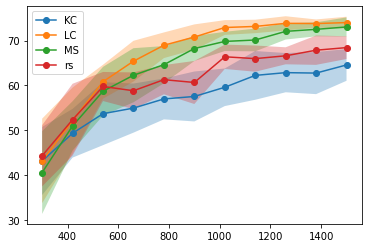

In [ ]:
plt.plot(samples, np.mean(acc_kc, axis = 0), "-o", label = "KC")
plt.fill_between(samples, np.mean(acc_kc, axis = 0)-np.std(acc_kc, axis = 0), np.mean(acc_kc, axis = 0)+np.std(acc_kc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_lc, axis = 0), "-o", label = "LC")
plt.fill_between(samples, np.mean(acc_lc, axis = 0)-np.std(acc_lc, axis = 0), np.mean(acc_lc, axis = 0)+np.std(acc_lc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_ms, axis = 0), "-o", label = "MS")
plt.fill_between(samples, np.mean(acc_ms, axis = 0)-np.std(acc_ms, axis = 0), np.mean(acc_ms, axis = 0)+np.std(acc_ms, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_rs, axis = 0), "-o", label = "RS")
plt.fill_between(samples, np.mean(acc_rs, axis = 0)-np.std(acc_rs, axis = 0), np.mean(acc_rs, axis = 0)+np.std(acc_rs, axis = 0), alpha=0.3)

plt.legend()